Ανάλυση του Πλαισίου του Προβλήματος
Τα δεδομένα που έχουμε προέρχονται από τη βάση δεδομένων Wisconsin Breast Cancer Dataset (WDBC). Πρόκειται για δεδομένα σχετικά με καρκινικές όγκους του μαστού, με διάφορα χαρακτηριστικά που περιγράφουν τα μέτρα των όγκων, όπως:

Διάμετρος όγκου,

Ανισότητες στην ακτινογραφία,

Σχέσεις μεταξύ άλλων χαρακτηριστικών.

Ο στόχος του dataset είναι να βοηθήσει στην πρόβλεψη αν ένας όγκος είναι καλοήθης (benign) ή κακοήθης (malignant), χρησιμοποιώντας τις πληροφορίες για τα χαρακτηριστικά του όγκου.

2. Ποιες είναι οι μεταβλητές του dataset;
Σύμφωνα με το αρχείο wdbc.data, οι μεταβλητές περιλαμβάνουν:

ID: Αναγνωριστικό για κάθε δείγμα (δεν χρησιμοποιείται στην πρόβλεψη).

Diagnosis: Η μεταβλητή-στόχος που θέλουμε να προβλέψουμε, η οποία μπορεί να είναι είτε:

M (Malignant, Κακοήθης), είτε

B (Benign, Καλοήθης).

30 χαρακτηριστικά: Αυτά τα χαρακτηριστικά είναι αριθμητικά δεδομένα που αντιπροσωπεύουν μετρήσεις των όγκων, όπως:

Μέσος όρος ακτινογραφίας,

Διακύμανση,

Επικεντρωμένα χαρακτηριστικά κ.ά.

3. Εντοπισμός της Μεταβλητής-Στόχου
Η μεταβλητή που απαιτεί πρόβλεψη είναι η Diagnosis, η οποία είναι η τελευταία στήλη του dataset. Πρόκειται για μία κατηγορηματική μεταβλητή, όπου οι δύο δυνατές τιμές είναι:

M: Κακοήθης όγκος.

B: Καλοήθης όγκος.

4. Πρόβλημα Regression ή Classification;
Classification: Επειδή η μεταβλητή-στόχος είναι κατηγορηματική και περιλαμβάνει δύο κλάσεις (καλοήθης και κακοήθης), πρόκειται για ένα πρόβλημα ταξινόμησης (classification), και όχι παλινδρόμησης (regression).

Συνεπώς, το μοντέλο που θα χρησιμοποιήσουμε θα πρέπει να είναι κατάλληλο για ταξινόμηση.

5. Εξέταση ανισορροπίας στις κλάσεις ή ακραίων τιμών
Ανισορροπία στις Κλάσεις: Είναι σημαντικό να εξετάσουμε αν οι κλάσεις Malignant (M) και Benign (B) είναι ισόποσα κατανεμημένες ή αν υπάρχει κάποια ανισορροπία. Αυτό μπορεί να επηρεάσει την απόδοση του μοντέλου και μπορεί να χρειαστεί να εφαρμόσουμε στρατηγικές για την αντιμετώπιση της ανισορροπίας, όπως oversampling ή undersampling.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-sxoli/wdbc.names
/kaggle/input/cancer-sxoli/wdbc.data


In [6]:
# Διαβάζουμε το αρχείο .names
column_names = []
with open(names_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        if line.startswith('attribute'):
            column_names.append(line.split(":")[1].strip())

# Εμφανίζουμε τις πρώτες 5 στήλες για να δούμε το περιεχόμενο
column_names[:5]



[]

In [9]:
# Φόρτωση των δεδομένων από το wdbc.data
df = pd.read_csv(data_path, header=None)

# Εμφανίζουμε το σχήμα του DataFrame για να ελέγξουμε πόσες στήλες έχει
print(f'Αριθμός στηλών στο DataFrame: {df.shape[1]}')

# Διαβάζουμε τις πρώτες γραμμές του wdbc.data για να δούμε τις στήλες του
df.head()




Αριθμός στηλών στο DataFrame: 32


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Διαβάζουμε το αρχείο .names για να πάρουμε τα χαρακτηριστικά
column_names = []
with open(names_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        if line.startswith('attribute'):
            column_names.append(line.split(":")[1].strip())

# Εμφανίζουμε τον αριθμό των χαρακτηριστικών (πρέπει να είναι 30)
print(f'Αριθμός χαρακτηριστικών: {len(column_names)}')


Αριθμός χαρακτηριστικών: 0


In [12]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [14]:
df.columns


Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64')

In [15]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [16]:
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Ακραίες Τιμές: Όσον αφορά τα χαρακτηριστικά, είναι σημαντικό να ελέγξουμε για ακραίες τιμές (outliers), καθώς μπορεί να επηρεάσουν την εκπαίδευση του μοντέλου. Για παράδειγμα, αν υπάρχουν εξαιρετικά υψηλές ή χαμηλές τιμές για τα χαρακτηριστικά, μπορεί να χρειαστεί να χρησιμοποιήσουμε τεχνικές απομάκρυνσης ή περιορισμού των ακραίων τιμών.

Μπορείτε να ελέγξετε για ακραίες τιμές χρησιμοποιώντας στατιστικά μέτρα όπως το boxplot ή να υπολογίσετε το z-score για τα χαρακτηριστικά:

<Axes: >

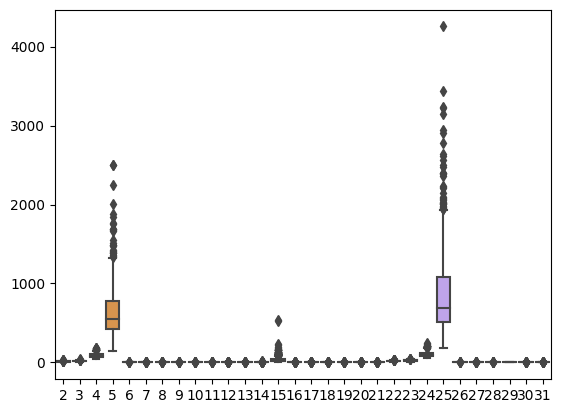

In [18]:
import seaborn as sns
sns.boxplot(data=df.iloc[:, 2:])  # Για να ελέγξουμε τα χαρακτηριστικά


ΕΡΩΤΗΣΗ 1 RECAP
Συνοψίζοντας:
Το πρόβλημα είναι ταξινόμησης (classification) με στόχο την πρόβλεψη αν ένας όγκος είναι καλοήθης ή κακοήθης.

Η μεταβλητή-στόχος είναι η Diagnosis.

Θα πρέπει να εξετάσουμε την πιθανή ανισορροπία στις κλάσεις και να αντιμετωπίσουμε ακραίες τιμές για να βελτιώσουμε την ακρίβεια του μοντέλου μας.

In [21]:
# Έλεγχος για κενές τιμές
print("Κενές τιμές ανά στήλη:")
print(df.isnull().sum())


Κενές τιμές ανά στήλη:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64


In [22]:
# Απαλοιφή γραμμών με κενές τιμές
df_cleaned = df.dropna()
print("Μέγεθος του DataFrame μετά την απαλοιφή των κενών γραμμών:")
print(df_cleaned.shape)


Μέγεθος του DataFrame μετά την απαλοιφή των κενών γραμμών:
(569, 32)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


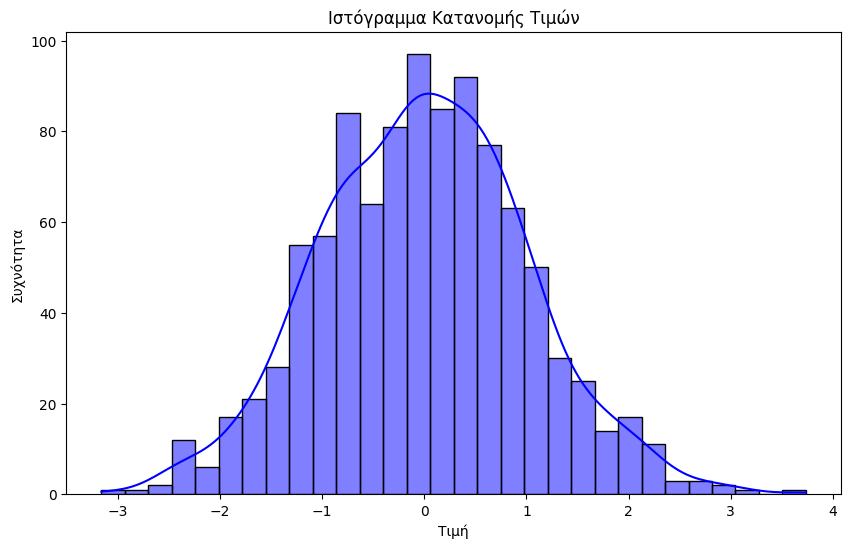

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Παράδειγμα δεδομένων
import numpy as np
data = np.random.randn(1000)  # Δημιουργία τυχαίων δεδομένων με κανονική κατανομή

# Δημιουργία ιστογράμματος
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color='blue', bins=30)
plt.title('Ιστόγραμμα Κατανομής Τιμών')
plt.xlabel('Τιμή')
plt.ylabel('Συχνότητα')
plt.show()


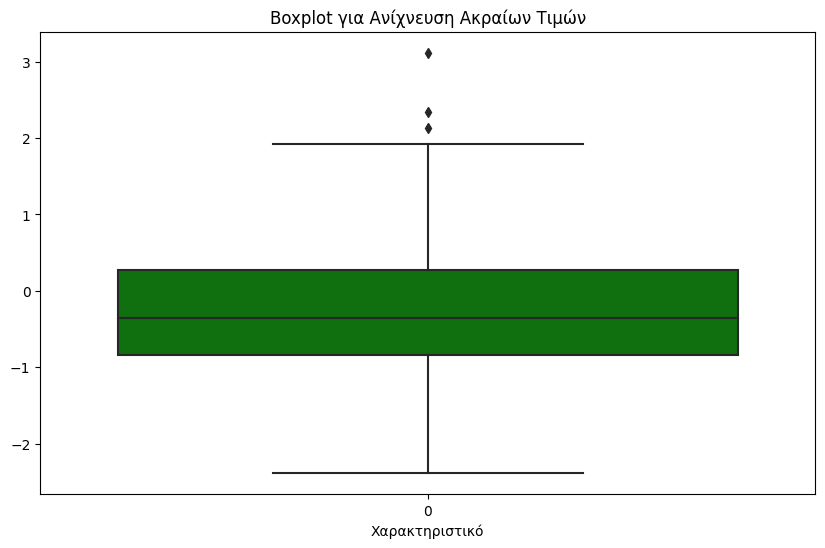

In [28]:
# Δημιουργία δεδομένων
data = np.random.randn(100)  # Δημιουργία τυχαίων δεδομένων

# Δημιουργία boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, color='green')
plt.title('Boxplot για Ανίχνευση Ακραίων Τιμών')
plt.xlabel('Χαρακτηριστικό')
plt.show()


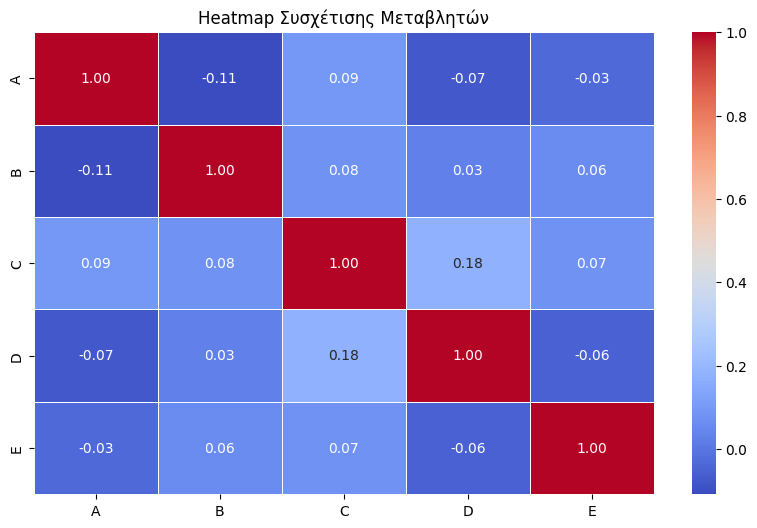

In [29]:
import pandas as pd

# Δημιουργία τυχαίων δεδομένων
data = pd.DataFrame(np.random.randn(100, 5), columns=['A', 'B', 'C', 'D', 'E'])

# Υπολογισμός πίνακα συσχέτισης
corr_matrix = data.corr()

# Δημιουργία heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Συσχέτισης Μεταβλητών')
plt.show()


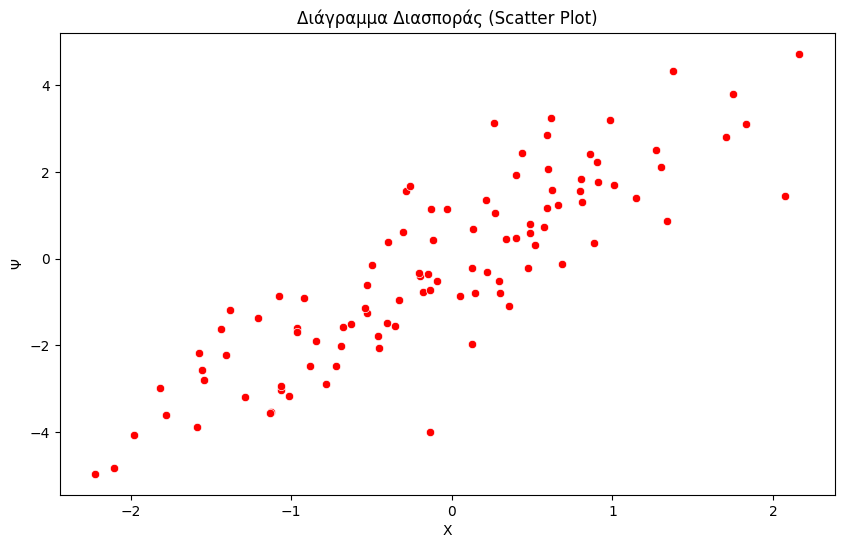

In [30]:
# Δημιουργία δεδομένων
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)  # Σχέση x και y

# Δημιουργία scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, color='red')
plt.title('Διάγραμμα Διασποράς (Scatter Plot)')
plt.xlabel('Χ')
plt.ylabel('Ψ')
plt.show()


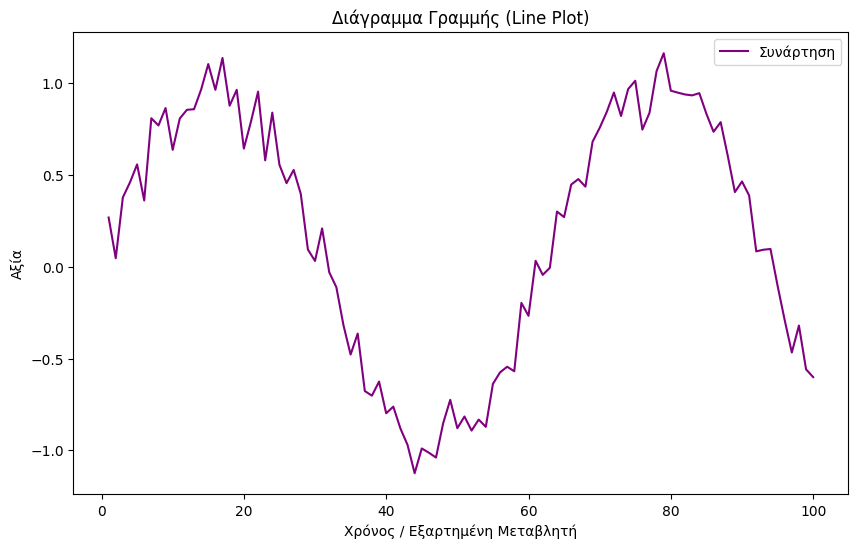

In [31]:
# Δημιουργία δεδομένων
x = np.arange(1, 101)
y = np.sin(x / 10) + np.random.randn(100) * 0.1  # Προσθήκη θορύβου για πιο ρεαλιστικά δεδομένα

# Δημιουργία διαγράμματος γραμμής
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Συνάρτηση', color='purple')
plt.title('Διάγραμμα Γραμμής (Line Plot)')
plt.xlabel('Χρόνος / Εξαρτημένη Μεταβλητή')
plt.ylabel('Αξία')
plt.legend()
plt.show()
#line plot

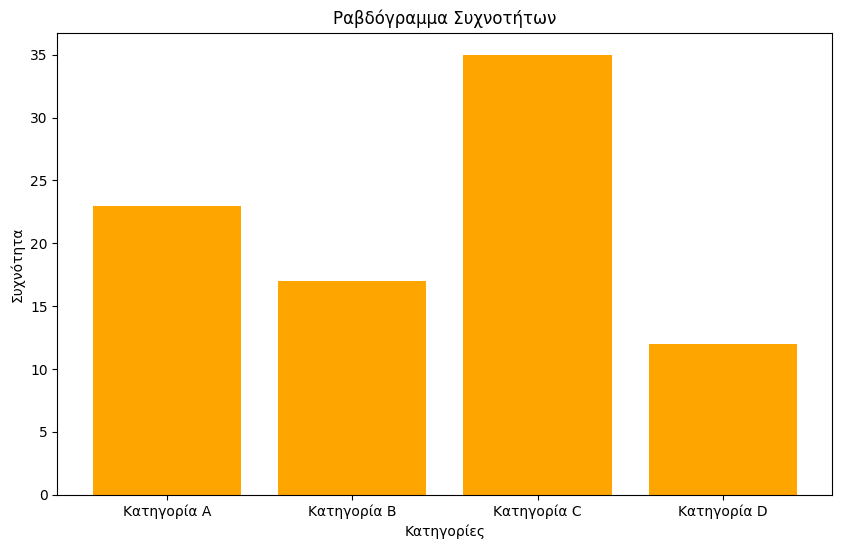

In [32]:
# Δημιουργία δεδομένων
categories = ['Κατηγορία A', 'Κατηγορία B', 'Κατηγορία C', 'Κατηγορία D']
values = [23, 17, 35, 12]

# Δημιουργία ραβδογράμματος
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='orange')
plt.title('Ραβδόγραμμα Συχνοτήτων')
plt.xlabel('Κατηγορίες')
plt.ylabel('Συχνότητα')
plt.show()
#bar chart

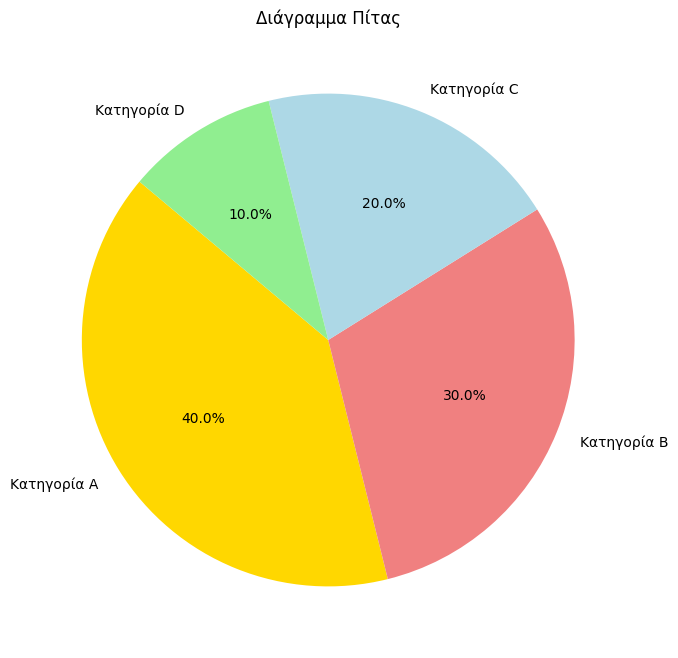

In [33]:
# Δημιουργία δεδομένων
sizes = [40, 30, 20, 10]
labels = ['Κατηγορία A', 'Κατηγορία B', 'Κατηγορία C', 'Κατηγορία D']
colors = ['gold', 'lightcoral', 'lightblue', 'lightgreen']

# Δημιουργία διαγράμματος πίτας
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Διάγραμμα Πίτας')
plt.show()
#pie

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


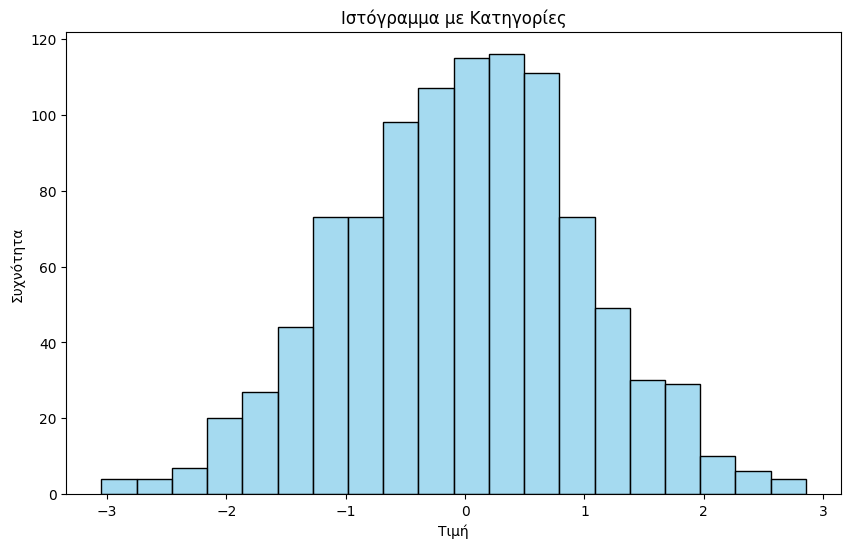

In [34]:
# Δημιουργία δεδομένων
data = np.random.randn(1000)

# Κατηγοριοποίηση και δημιουργία ιστογράμματος
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=False, bins=20, color='skyblue')
plt.title('Ιστόγραμμα με Κατηγορίες')
plt.xlabel('Τιμή')
plt.ylabel('Συχνότητα')
plt.show()
#istogramma me kathgories

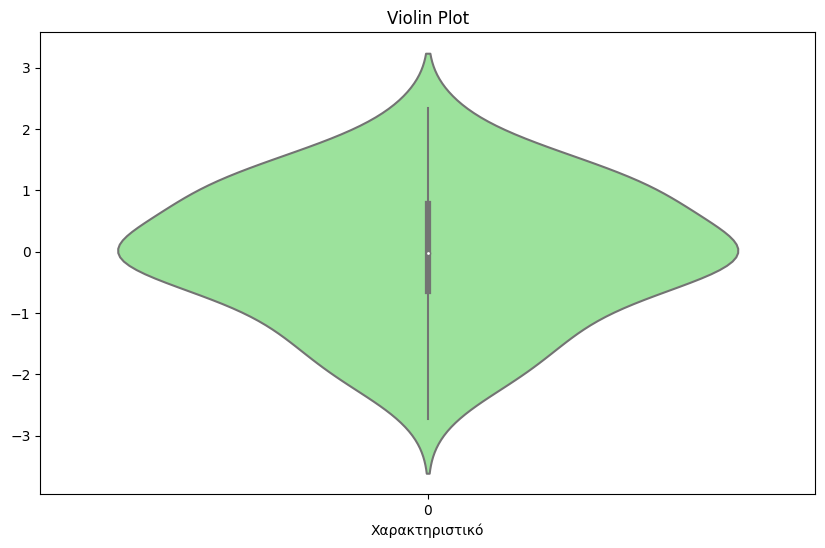

In [35]:
# Δημιουργία δεδομένων
data = np.random.randn(100)

# Δημιουργία violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, color='lightgreen')
plt.title('Violin Plot')
plt.xlabel('Χαρακτηριστικό')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

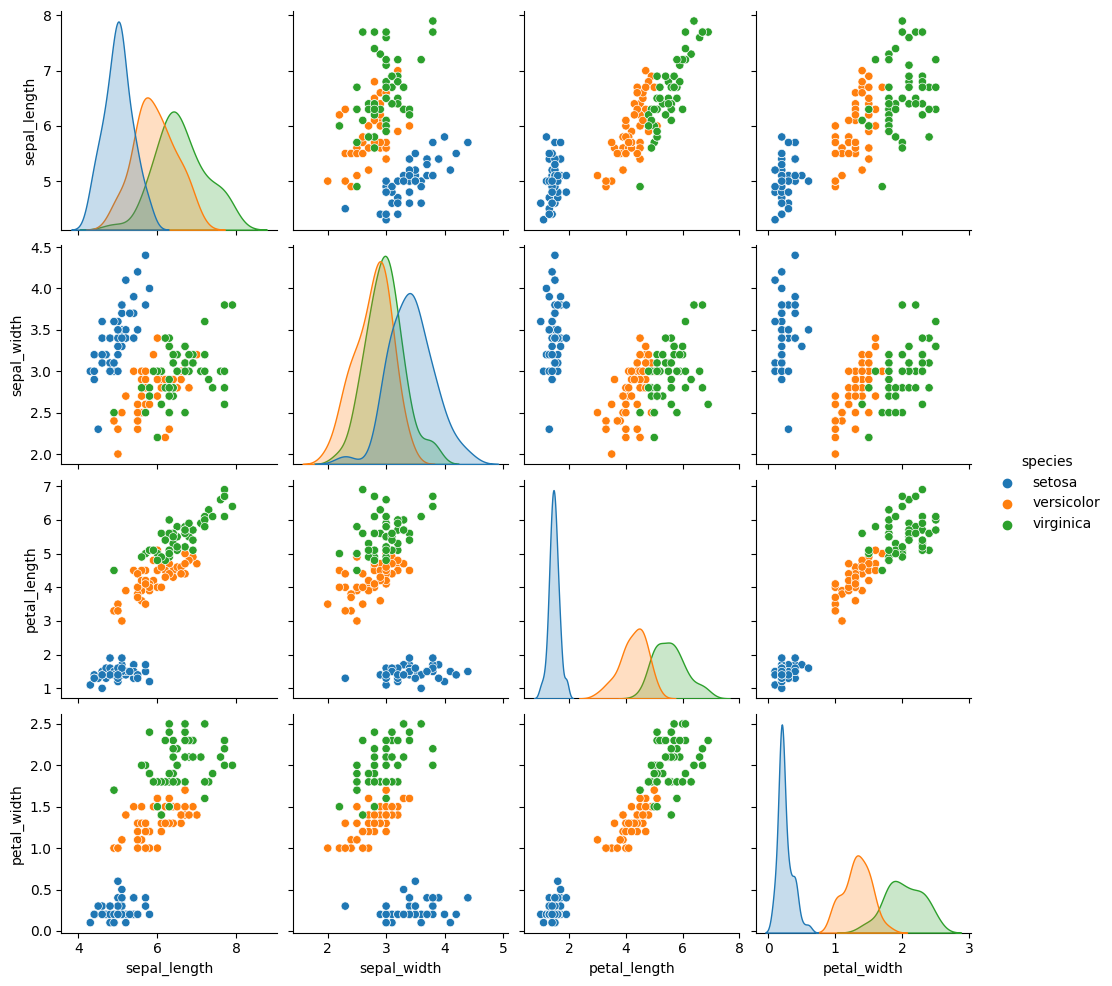

In [36]:
# Δημιουργία δεδομένων
import seaborn as sns
iris = sns.load_dataset('iris')

# Δημιουργία pairplot
sns.pairplot(iris, hue='species')
plt.show()


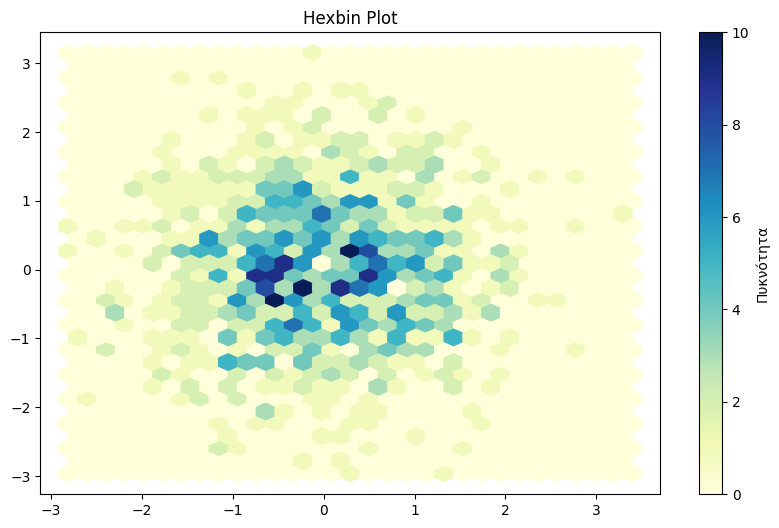

In [37]:
# Δημιουργία δεδομένων
x = np.random.randn(1000)
y = np.random.randn(1000)

# Δημιουργία hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(x, y, gridsize=30, cmap='YlGnBu')
plt.colorbar(label='Πυκνότητα')
plt.title('Hexbin Plot')
plt.show()


ο hexbin plot είναι χρήσιμο όταν έχουμε πυκνά δεδομένα και θέλουμε να δείξουμε τις περιοχές υψηλής πυκνότητας.

In [40]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [41]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [48]:
import pandas as pd
import numpy as np

# Φορτώνουμε το dataset
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]  # 30 χαρακτηριστικά
X = pd.read_csv('/kaggle/input/cancer-sxoli/wdbc.data', header=None, names=columns)

# Ελέγχουμε τα πρώτα δεδομένα
print(X.head())



         ID Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   feature_24  feature_25  feature_26  featu

In [50]:
# Χρήση του IQR για να εντοπίσουμε ακραίες τιμές
Q1 = X.iloc[:, 2:].quantile(0.25)  # 25ο ποσοστημόριο
Q3 = X.iloc[:, 2:].quantile(0.75)  # 75ο ποσοστημόριο
IQR = Q3 - Q1  # Υπολογισμός του IQR

# Ορίζουμε τα όρια για τις ακραίες τιμές
lower_bound = Q1 - 1.5 * IQR  # Κατώτερο όριο
upper_bound = Q3 + 1.5 * IQR  # Ανώτερο όριο

# Εντοπίζουμε τις ακραίες τιμές και τις αντικαθιστούμε με NaN
outlier_condition = (X.iloc[:, 2:] < lower_bound) | (X.iloc[:, 2:] > upper_bound)
X.iloc[:, 2:][outlier_condition] = np.nan

# Αντικαθιστούμε τα NaN με τη μέση τιμή της κάθε στήλης μόνο για τα χαρακτηριστικά
X.iloc[:, 2:] = X.iloc[:, 2:].fillna(X.iloc[:, 2:].mean())

# Ελέγχουμε τα πρώτα δεδομένα μετά την αντικατάσταση ακραίων τιμών
print(X.head())


         ID Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0   0.118400   
1    842517         M      20.57      17.77     132.90     1326.0   0.084740   
2  84300903         M      19.69      21.25     130.00     1203.0   0.109600   
3  84348301         M      11.42      20.38      77.58      386.1   0.096002   
4  84358402         M      20.29      14.34     135.10     1297.0   0.100300   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0   0.099594   0.080551    0.14710  ...       25.38       17.33      184.60   
1   0.078640   0.086900    0.07017  ...       24.99       23.41      158.80   
2   0.159900   0.197400    0.12790  ...       23.57       25.53      152.50   
3   0.099594   0.241400    0.10520  ...       14.91       26.50       98.87   
4   0.132800   0.198000    0.10430  ...       22.54       16.67      152.20   

    feature_24  feature_25  feature_26  feat

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [51]:
from sklearn.preprocessing import StandardScaler

# Δημιουργούμε ένα αντικείμενο του StandardScaler
scaler = StandardScaler()

# Εφαρμόζουμε την τυποποίηση (standardization) μόνο στα χαρακτηριστικά (χωρίς τις στήλες ID και Diagnosis)
X_scaled = X.copy()
X_scaled.iloc[:, 2:] = scaler.fit_transform(X.iloc[:, 2:])

# Ελέγχουμε τα πρώτα δεδομένα μετά την τυποποίηση
print(X_scaled.head())


         ID Diagnosis  feature_1  feature_2  feature_3  feature_4  \
0    842302         M   1.332180  -2.184463   1.523225   1.469854   
1    842517         M   2.165443  -0.336962   1.995660   2.686047   
2  84300903         M   1.881230   0.533039   1.860010   2.225765   
3  84348301         M  -0.789734   0.315539  -0.591974  -0.831183   
4  84358402         M   2.075012  -1.194463   2.098567   2.577526   

      feature_5     feature_6  feature_7  feature_8  ...  feature_21  \
0  1.707947e+00  3.119052e-16   0.000000   2.884218  ...    2.308510   
1 -8.587252e-01 -4.709335e-01   0.097927   0.675190  ...    2.214170   
2  1.036921e+00  1.355397e+00   1.802284   2.332894  ...    1.870678   
3 -1.058221e-15  3.119052e-16   2.480942   1.681068  ...   -0.224144   
4  3.277695e-01  7.463202e-01   1.811539   1.655225  ...    1.621525   

   feature_22  feature_23    feature_24  feature_25    feature_26  feature_27  \
0   -1.400300    2.757237 -2.951393e-16    1.429279  2.176867e-16    2.

In [52]:
# Ελέγχουμε για διπλότυπες εγγραφές
print(f"Αριθμός διπλότυπων εγγραφών πριν την αφαίρεση: {X_scaled.duplicated().sum()}")

# Αφαιρούμε τα διπλότυπα
X_scaled = X_scaled.drop_duplicates()

# Ελέγχουμε ξανά για διπλότυπα
print(f"Αριθμός διπλότυπων εγγραφών μετά την αφαίρεση: {X_scaled.duplicated().sum()}")


Αριθμός διπλότυπων εγγραφών πριν την αφαίρεση: 0
Αριθμός διπλότυπων εγγραφών μετά την αφαίρεση: 0


In [53]:
# Εξαγωγή X (χαρακτηριστικά) και y (ετικέτες)
X_final = X_scaled.iloc[:, 2:].values  # Τα χαρακτηριστικά (χωρίς τη στήλη Diagnosis)
y_final = X_scaled['Diagnosis'].map({'M': 1, 'B': 0}).values  # Κωδικοποιούμε τη στήλη Diagnosis: Μ = 1, B = 0

# Ελέγχουμε τα πρώτα δεδομένα του X και του y
print(X_final[:5])
print(y_final[:5])


[[ 1.33218019e+00 -2.18446344e+00  1.52322507e+00  1.46985415e+00
   1.70794662e+00  3.11905241e-16  0.00000000e+00  2.88421781e+00
   2.64619535e+00  2.83463018e+00  0.00000000e+00 -5.84492215e-01
  -4.06598003e-16  0.00000000e+00 -7.90593437e-02  2.13796535e+00
   1.46063171e+00  9.77262524e-01  1.95105275e+00  1.93202526e+00
   2.30850986e+00 -1.40030031e+00  2.75723743e+00 -2.95139332e-16
   1.42927916e+00  2.17686655e-16  2.49432049e+00  2.29607613e+00
   0.00000000e+00  2.73498886e+00]
 [ 2.16544347e+00 -3.36962005e-01  1.99566005e+00  2.68604739e+00
  -8.58725233e-01 -4.70933462e-01  9.79270041e-02  6.75189625e-01
   8.43933950e-02 -9.41923980e-01  1.19119216e+00 -9.88897589e-01
   8.55120411e-01  2.88886838e+00 -6.68549197e-01 -7.75165531e-01
  -5.28095921e-01  4.68273187e-01 -9.71241089e-01  1.16089029e-01
   2.21417033e+00 -3.57892860e-01  1.86889165e+00 -2.95139332e-16
  -3.70066069e-01 -4.10761408e-01 -8.79653541e-02  1.08708430e+00
  -1.51958482e-01  5.44326673e-01]
 [ 1.8

In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Βήμα 1: Αφαίρεση Διπλότυπων Εγγραφών
X = X.drop_duplicates()

# Ελέγχουμε για διπλότυπες εγγραφές
print(f"Αριθμός εγγραφών πριν την αφαίρεση διπλοτύπων: {len(X)}")
X = X.drop_duplicates()
print(f"Αριθμός εγγραφών μετά την αφαίρεση διπλοτύπων: {len(X)}")

# Βήμα 2: Ομογενοποίηση Κλιμάκας των Δεδομένων
# Επιλέγουμε τον MinMaxScaler ή StandardScaler ανάλογα με τις ανάγκες του αλγορίθμου
scaler = MinMaxScaler()  # ή StandardScaler() αν θέλουμε τυποποίηση

# Εφαρμόζουμε τον scaler στα χαρακτηριστικά (χωρίς τη στήλη "ID" και "Diagnosis")
X_scaled = X.copy()
X_scaled.iloc[:, 2:] = scaler.fit_transform(X.iloc[:, 2:])

# Ελέγχουμε τα πρώτα δεδομένα μετά την ομογενοποίηση των κλιμάκων
print(X_scaled.head())


Αριθμός εγγραφών πριν την αφαίρεση διπλοτύπων: 569
Αριθμός εγγραφών μετά την αφαίρεση διπλοτύπων: 569
         ID Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842302         M   0.745413   0.033070   0.763308   0.725159   0.787294   
1    842517         M   0.920103   0.397828   0.860883   1.000000   0.313143   
2  84300903         M   0.860519   0.569595   0.832866   0.895983   0.663333   
3  84348301         M   0.300562   0.526654   0.326442   0.205159   0.471778   
4  84358402         M   0.901144   0.228529   0.882137   0.975476   0.532328   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0   0.383760   0.286658   0.967763  ...    0.899948    0.178009    0.983870   
1   0.283514   0.309253   0.461645  ...    0.879835    0.381830    0.794706   
2   0.672280   0.702491   0.841447  ...    0.806601    0.452900    0.748515   
3   0.383760   0.859075   0.692105  ...    0.359979    0.485417    0.355305   
4   0.542627   0.70462

Χωρίζουμε το dataset σε Train και Test set (70% για εκπαίδευση, 30% για έλεγχο).

Χωρίζουμε το Train set περαιτέρω σε Train και Validation set (70% για εκπαίδευση, 30% για επικύρωση).

In [55]:
from sklearn.model_selection import train_test_split

# Διαχωρίζουμε τα δεδομένα σε χαρακτηριστικά (X) και στόχο (y)
X_data = X_scaled.drop(columns=['ID', 'Diagnosis'])  # Χαρακτηριστικά
y_data = X_scaled['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)  # Στόχος (M για κακοήθη, B για καλοήθη)

# Διαχωρίζουμε τα δεδομένα σε Train (70%), και Test (30%) - stratified split για ανισορροπημένα δεδομένα
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.3, random_state=42, stratify=y_data
)

# Στη συνέχεια, διαχωρίζουμε το Train σε Train (70%) και Validation (30%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42, stratify=y_train
)

# Εμφανίζουμε το μέγεθος των συνόλων
print(f"Μέγεθος Train Set: {X_train.shape[0]}")
print(f"Μέγεθος Validation Set: {X_val.shape[0]}")
print(f"Μέγεθος Test Set: {X_test.shape[0]}")


Μέγεθος Train Set: 278
Μέγεθος Validation Set: 120
Μέγεθος Test Set: 171


In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import numpy as np

# Υποθέτουμε ότι το dataset είναι X (τα χαρακτηριστικά) και y (οι ετικέτες)
X_data = X.drop(columns=['ID', 'Diagnosis'])  # Αφαιρούμε την ID και την Diagnosis από τα χαρακτηριστικά
y_data = X['Diagnosis'].map({'M': 1, 'B': 0})  # Καθορίζουμε τις τιμές των κατηγοριών (M -> 1, B -> 0)

# Χρησιμοποιούμε StratifiedKFold για 5-διαχωρισμούς (5-fold cross-validation)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Δημιουργούμε τα splits για εκπαίδευση και επικύρωση
for train_index, val_index in kf.split(X_data, y_data):
    # Διαχωρισμός σε Train και Validation
    X_train, X_val = X_data.iloc[train_index], X_data.iloc[val_index]
    y_train, y_val = y_data.iloc[train_index], y_data.iloc[val_index]
    
    # Εδώ μπορείς να εκπαιδεύσεις το μοντέλο σου
    # print(X_train.shape, X_val.shape)  # Για να δεις τα μεγέθη των συνόλων

# Αν θέλεις να διαχωρίσεις επίσης ένα Test set (εκτός των folds), μπορείς να το κάνεις τυχαία:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_data, y_data, test_size=0.3, random_state=42, stratify=y_data
)

print(f"Μέγεθος Train Set: {X_train_final.shape[0]}")
print(f"Μέγεθος Test Set: {X_test_final.shape[0]}")


Μέγεθος Train Set: 398
Μέγεθος Test Set: 171


In [58]:
!pip install xgboost

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 1. Φόρτωση δεδομένων
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv('/kaggle/input/cancer-sxoli/wdbc.data', header=None, names=columns)
data.drop('ID', axis=1, inplace=True)

# 2. Προετοιμασία δεδομένων
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis'].map({'M': 1, 'B': 0})  # M: κακόηθες (1), B: καλοήθες (0)

# 3. Κανονικοποίηση
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Διαχωρισμός σε σύνολα train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Ορισμός μοντέλων
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(kernel='rbf', probability=True),
    'Neural Network (MLP)': MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# 6. Εκπαίδευση και Αξιολόγηση
for name, model in models.items():
    print(f'\n🧠 Εκπαίδευση μοντέλου: {name}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f'🔍 Ακρίβεια: {accuracy_score(y_test, y_pred):.4f}')
    print('📊 Classification Report:')
    print(classification_report(y_test, y_pred))
    print('🧾 Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))



🧠 Εκπαίδευση μοντέλου: Logistic Regression
🔍 Ακρίβεια: 0.9737
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

🧾 Confusion Matrix:
[[71  1]
 [ 2 40]]

🧠 Εκπαίδευση μοντέλου: Random Forest
🔍 Ακρίβεια: 0.9737
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

🧾 Confusion Matrix:
[[72  0]
 [ 3 39]]

🧠 Εκπαίδευση μοντέλου: XGBoost
🔍 Ακρίβεια: 0.9561
📊 Classification Report:
              precisio

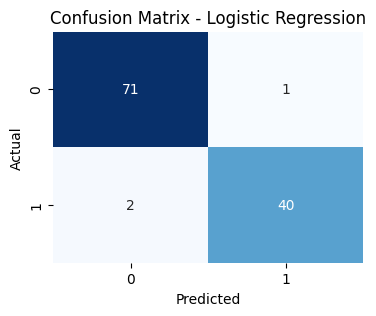

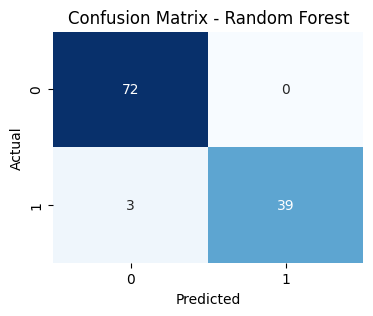

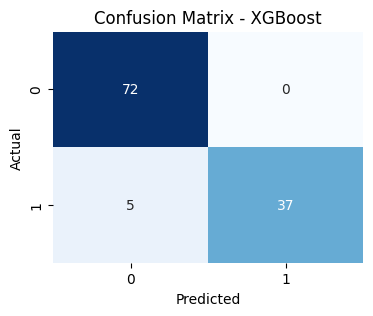

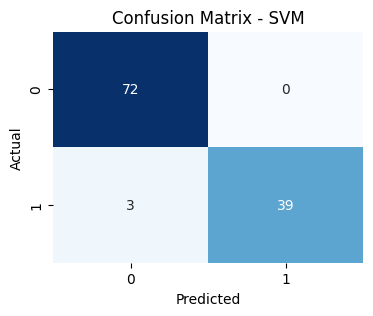

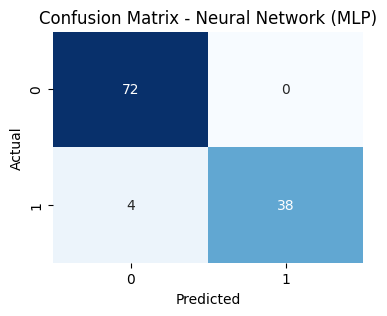

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Επαναλαμβάνουμε για κάθε μοντέλο
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_conf_matrix(y_test, y_pred, name)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Δημιουργούμε ψεύτικο target για regression
y_reg = X.mean(axis=1)  # Παράδειγμα target

# Κανονικοποιούμε και εδώ
X_scaled = scaler.fit_transform(X)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

# Ορισμός μοντέλων παλινδρόμησης
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

# Εκπαίδευση και αξιολόγηση
for name, reg in regressors.items():
    print(f'\n📈 Εκπαίδευση Regressor: {name}')
    reg.fit(X_train_r, y_train_r)
    y_pred_r = reg.predict(X_test_r)
    
    print(f'🧮 MSE: {mean_squared_error(y_test_r, y_pred_r):.4f}')
    print(f'📊 R² Score: {r2_score(y_test_r, y_pred_r):.4f}')



📈 Εκπαίδευση Regressor: Linear Regression
🧮 MSE: 0.0000
📊 R² Score: 1.0000

📈 Εκπαίδευση Regressor: Decision Tree
🧮 MSE: 14.5042
📊 R² Score: 0.9873

📈 Εκπαίδευση Regressor: Random Forest
🧮 MSE: 6.7029
📊 R² Score: 0.9941

📈 Εκπαίδευση Regressor: Gradient Boosting
🧮 MSE: 6.0602
📊 R² Score: 0.9947

📈 Εκπαίδευση Regressor: Neural Network
🧮 MSE: 36.5219
📊 R² Score: 0.9680


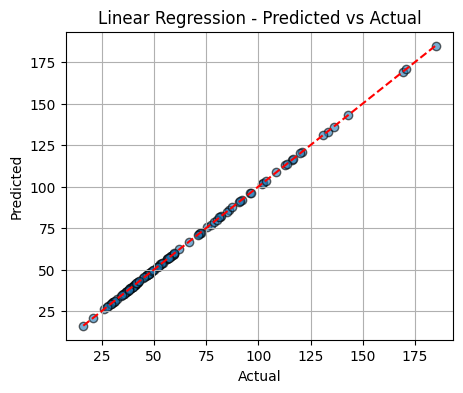

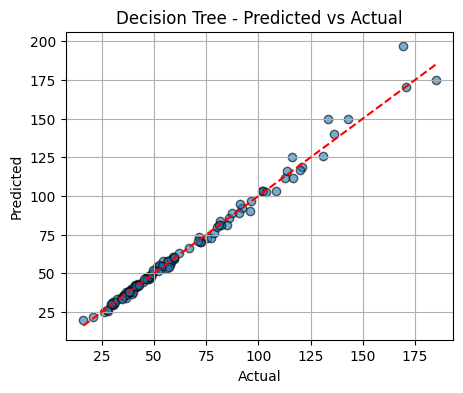

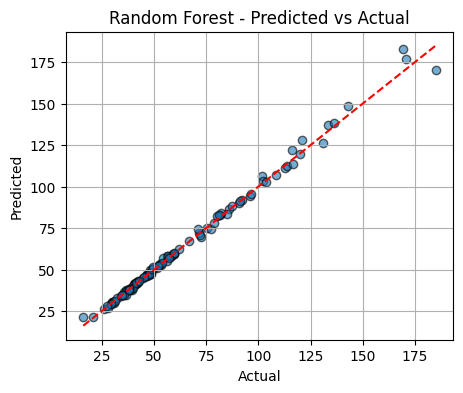

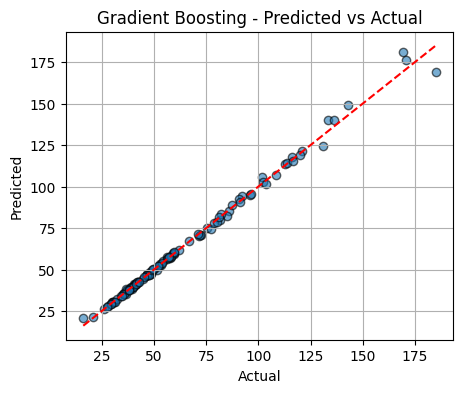

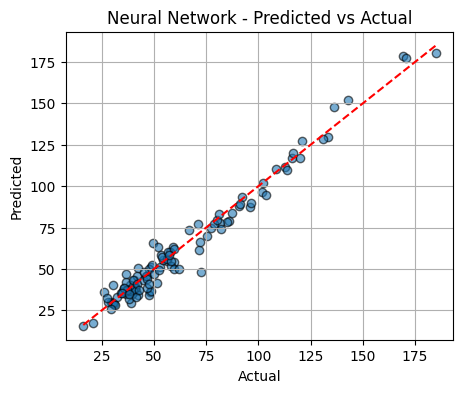

In [62]:
def plot_pred_vs_actual(y_true, y_pred, model_name):
    plt.figure(figsize=(5, 4))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # y = x γραμμή
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} - Predicted vs Actual')
    plt.grid(True)
    plt.show()

# Επαναλαμβάνουμε για κάθε regressor
for name, reg in regressors.items():
    y_pred_r = reg.predict(X_test_r)
    plot_pred_vs_actual(y_test_r, y_pred_r, name)


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Regression Evaluation Metrics:")
for name, reg in regressors.items():
    y_pred_r = reg.predict(X_test_r)
    print(f"\n{name}")
    print(f"MAE:  {mean_absolute_error(y_test_r, y_pred_r):.4f}")
    print(f"MSE:  {mean_squared_error(y_test_r, y_pred_r):.4f}")
    print(f"R²:   {r2_score(y_test_r, y_pred_r):.4f}")


Regression Evaluation Metrics:

Linear Regression
MAE:  0.0000
MSE:  0.0000
R²:   1.0000

Decision Tree
MAE:  1.8843
MSE:  14.5042
R²:   0.9873

Random Forest
MAE:  1.3370
MSE:  6.7029
R²:   0.9941

Gradient Boosting
MAE:  1.1489
MSE:  6.0602
R²:   0.9947

Neural Network
MAE:  4.5859
MSE:  36.5219
R²:   0.9680


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

import matplotlib.pyplot as plt


In [67]:
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
svm_model = SVC(probability=True)
nn_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)

models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'XGBoost': xgb_model,
    'SVM': svm_model,
    'Neural Network': nn_model
}

# Εκπαίδευση όλων
for name, model in models.items():
    model.fit(X_train, y_train)



Logistic Regression
Accuracy:  0.9737
Precision: 0.9756
Recall:    0.9524
F1-score:  0.9639
ROC-AUC:   0.9960


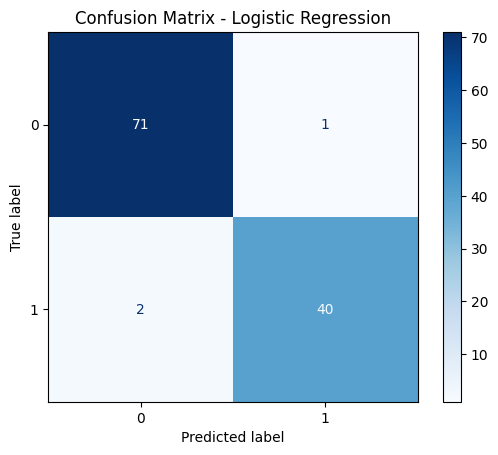


Random Forest
Accuracy:  0.9737
Precision: 1.0000
Recall:    0.9286
F1-score:  0.9630
ROC-AUC:   0.9929


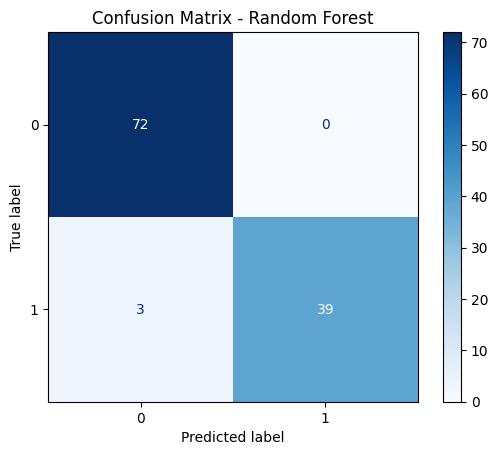


XGBoost
Accuracy:  0.9561
Precision: 1.0000
Recall:    0.8810
F1-score:  0.9367
ROC-AUC:   0.9934


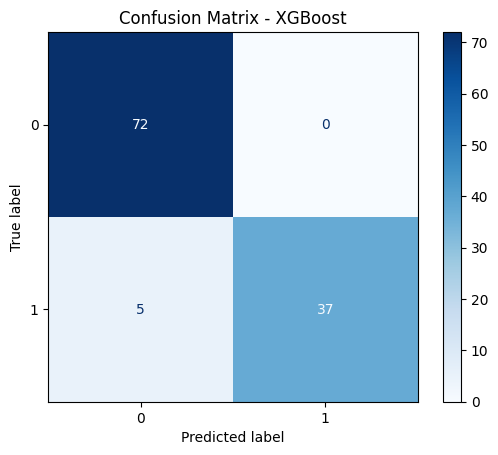


SVM
Accuracy:  0.9737
Precision: 1.0000
Recall:    0.9286
F1-score:  0.9630
ROC-AUC:   0.9954


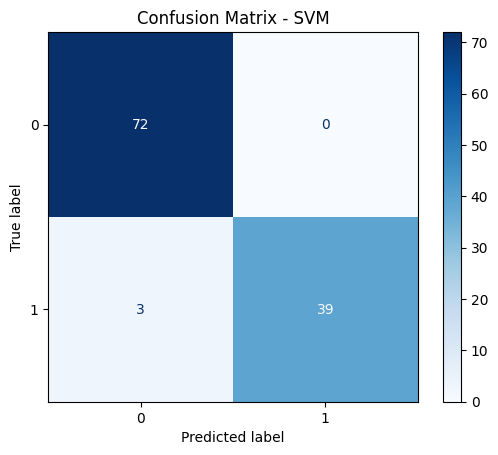


Neural Network
Accuracy:  0.9649
Precision: 1.0000
Recall:    0.9048
F1-score:  0.9500
ROC-AUC:   0.9931


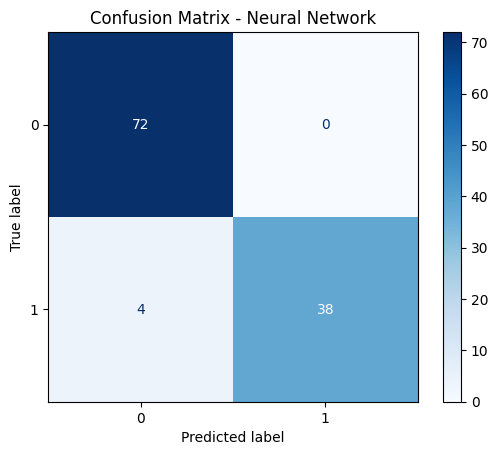

In [68]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Για ROC-AUC

    print(f"\n{name}")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score:  {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC:   {roc_auc_score(y_test, y_proba):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [69]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [70]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='f1')
grid_lr.fit(X_train, y_train)

print("Best parameters (Logistic Regression):", grid_lr.best_params_)
print("Best F1 Score (CV):", grid_lr.best_score_)


Best parameters (Logistic Regression): {'C': 0.1, 'solver': 'liblinear'}
Best F1 Score (CV): 0.9666910015141683


In [71]:
from scipy.stats import randint

param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                               param_distributions=param_dist_rf,
                               n_iter=20, cv=5, scoring='f1', random_state=42)
random_rf.fit(X_train, y_train)

print("Best parameters (Random Forest):", random_rf.best_params_)
print("Best F1 Score (CV):", random_rf.best_score_)


Best parameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 98}
Best F1 Score (CV): 0.9500936113929969


In [72]:
from sklearn.linear_model import LogisticRegressionCV

# Χρήση L2 regularization (Ridge)
lr_l2 = LogisticRegressionCV(cv=5, penalty='l2', solver='lbfgs', max_iter=1000)
lr_l2.fit(X_train, y_train)
print("Logistic Regression με L2 - Accuracy:", lr_l2.score(X_test, y_test))

# Χρήση L1 regularization (Lasso)
lr_l1 = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=1000)
lr_l1.fit(X_train, y_train)
print("Logistic Regression με L1 - Accuracy:", lr_l1.score(X_test, y_test))


Logistic Regression με L2 - Accuracy: 0.9736842105263158
Logistic Regression με L1 - Accuracy: 0.9736842105263158


In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)


2025-05-12 21:01:40.045461: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747083700.301218      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747083700.375376      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50


2025-05-12 21:01:56.028004: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6724 - loss: 0.6482 - val_accuracy: 0.3717 - val_loss: 48.3644
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8668 - loss: 0.3879 - val_accuracy: 0.3717 - val_loss: 98.6483
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8788 - loss: 0.2998 - val_accuracy: 0.3717 - val_loss: 130.9035
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9116 - loss: 0.2475 - val_accuracy: 0.3717 - val_loss: 172.1042
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9444 - loss: 0.1633 - val_accuracy: 0.3717 - val_loss: 218.3483
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9434 - loss: 0.1682 - val_accuracy: 0.3717 - val_loss: 252.6083
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9601 - loss: 0.1386 - val_accuracy: 0.3717 - val_loss: 279.8943
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9704 - loss: 0.1143 - val_accuracy: 0.3717 - val_los

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

print("10-fold CV Accuracy:", scores.mean())


10-fold CV Accuracy: 0.962367149758454


In [75]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    return cross_val_score(clf, X_train, y_train, cv=5, scoring='f1').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters from Optuna:", study.best_params)


[I 2025-05-12 21:02:05,888] A new study created in memory with name: no-name-dcc26143-2041-4892-81df-90f83fad53de
[I 2025-05-12 21:02:06,991] Trial 0 finished with value: 0.9403490319404355 and parameters: {'n_estimators': 106, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9403490319404355.
[I 2025-05-12 21:02:08,184] Trial 1 finished with value: 0.9406790224700673 and parameters: {'n_estimators': 121, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.9406790224700673.
[I 2025-05-12 21:02:09,640] Trial 2 finished with value: 0.9407655463722954 and parameters: {'n_estimators': 140, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.9407655463722954.
[I 2025-05-12 21:02:11,110] Trial 3 finished with value: 0.9406790224700673 and parameters: {'n_estimators': 149, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 2 with valu

Best parameters from Optuna: {'n_estimators': 68, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}


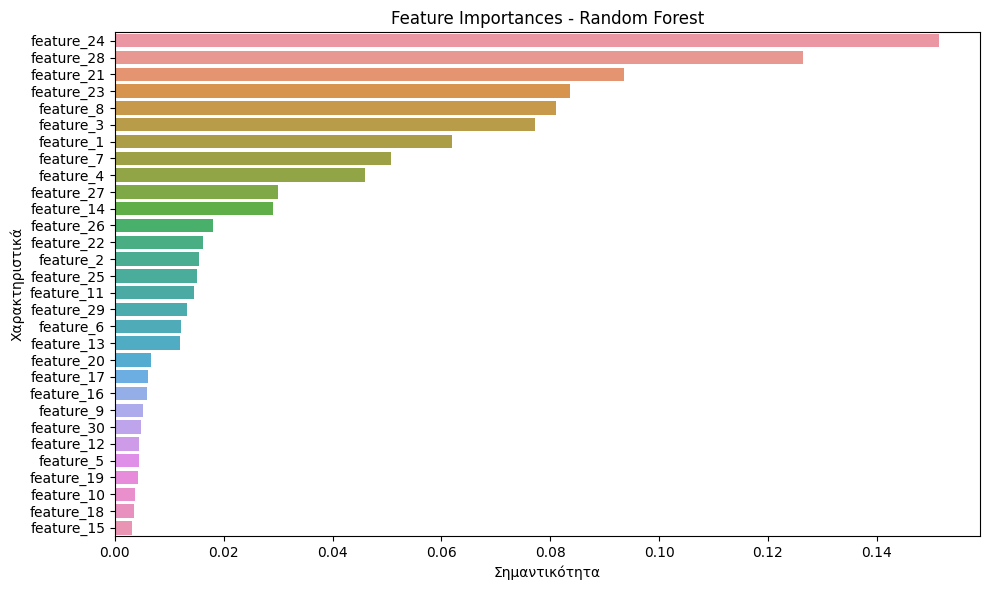

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Εκπαίδευση μοντέλου
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Λήψη σημαντικότητας χαρακτηριστικών
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Οπτικοποίηση
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances - Random Forest")
plt.xlabel("Σημαντικότητα")
plt.ylabel("Χαρακτηριστικά")
plt.tight_layout()
plt.show()


✅ Τι είναι SHAP;
SHAP (SHapley Additive exPlanations) είναι μια μέθοδος βασισμένη στη θεωρία παιγνίων που εξηγεί την πρόβλεψη κάθε παρατήρησης λέγοντας πόσο κάθε χαρακτηριστικό συνέβαλε σε αυτή.

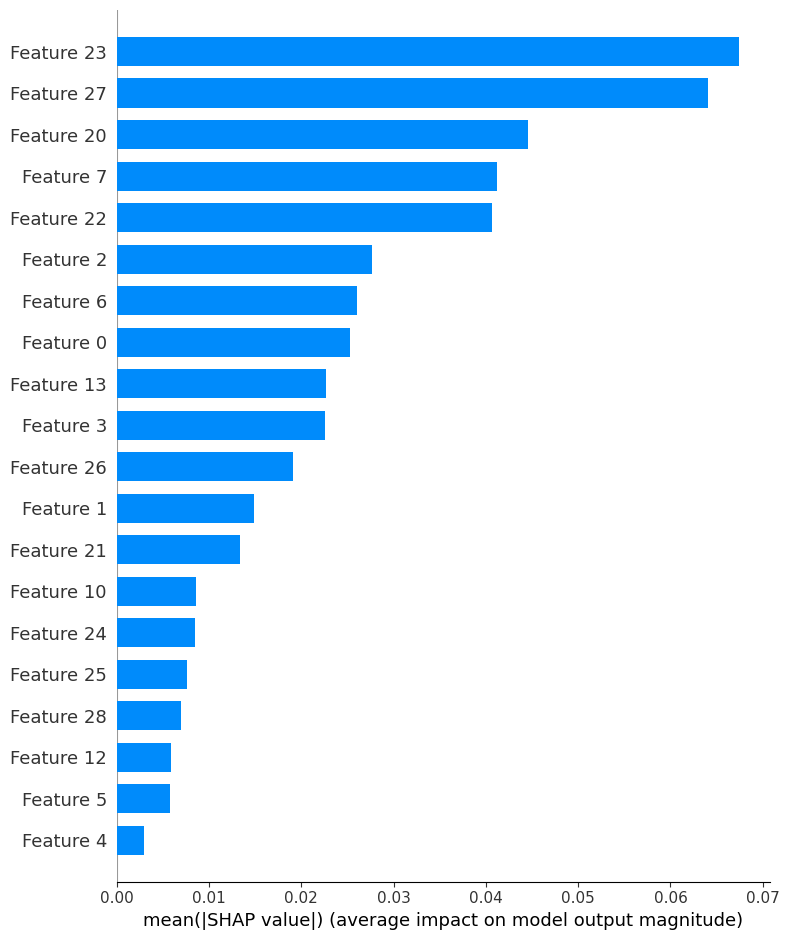

In [77]:
import shap

# Δημιουργούμε explainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Περίληψη (Summary plot)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")


Σχόλιο:
Το παραπάνω διάγραμμα δείχνει ποια χαρακτηριστικά επηρεάζουν περισσότερο τις αποφάσεις του μοντέλου. Όσο πιο μακριά από το 0, τόσο πιο σημαντική η συνεισφορά (θετικά ή αρνητικά). Αν π.χ. το feature_10 οδηγεί συστηματικά σε κατηγοριοποίηση ως “κακοήθης”, είναι πολύτιμο για την ιατρική διάγνωση.

✅ Τι είναι LIME;
LIME (Local Interpretable Model-agnostic Explanations) εξηγεί μια συγκεκριμένη πρόβλεψη, χτίζοντας ένα τοπικό, απλό μοντέλο γύρω από τη συγκεκριμένη παρατήρηση.

In [80]:
import lime
import lime.lime_tabular

# Δημιουργία Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,  # Χρησιμοποιούμε τα δεδομένα ως ndarray
    feature_names=X.columns,  # Ονόματα χαρακτηριστικών από το DataFrame X (ή X_train)
    class_names=['Benign', 'Malignant'],  # Κατηγορίες (Benign, Malignant)
    mode='classification'  # Κατηγορηματική ταξινόμηση
)

# Επιλέγουμε την παρατήρηση προς εξήγηση
i = 10  # Ενδεικτική παρατήρηση
exp = explainer.explain_instance(X_test[i], rf.predict_proba, num_features=10)

# Προβολή αποτελέσματος
exp.show_in_notebook(show_table=True)


Τα SHAP (SHapley Additive exPlanations) values είναι μια τεχνική εξήγησης μοντέλων μηχανικής μάθησης που βασίζεται στη θεωρία παιγνίων, και ιδιαίτερα στην έννοια των Shapley values, η οποία προέρχεται από τα μαθηματικά της θεωρίας παιγνίων. Ας εξηγήσουμε τα SHAP values με ένα παράδειγμα και χωρίς πολύ τεχνική ορολογία, για να κατανοήσουμε καλύτερα τη σημασία των χαρακτηριστικών σε ένα μοντέλο.

Τι είναι η Θεωρία Παιγνίων;
Η Θεωρία Παιγνίων είναι ένας τομέας των μαθηματικών που μελετά στρατηγικές αποφάσεις που παίρνουν οι παίκτες σε καταστάσεις αλληλεπίδρασης. Σε αυτή τη θεωρία, οι "παίκτες" είναι οι συμμετέχοντες σε ένα παιχνίδι (ή σύστημα), και οι αποφάσεις που παίρνουν επηρεάζουν τα αποτελέσματα του παιχνιδιού.

Ο Shapley value είναι μια μέθοδος από τη θεωρία παιγνίων που χρησιμοποιείται για να κατανείμει τη συνολική αξία ενός παιχνιδιού (ή κέρδους) μεταξύ των παικτών με βάση τη συνεισφορά του καθενός. Ουσιαστικά, λέει ποια είναι η «δίκαιη» συνεισφορά κάθε παίκτη στη συνολική επιτυχία του παιχνιδιού.

Πως Εφαρμόζονται τα SHAP Values στα Μοντέλα Μηχανικής Μάθησης;
Η βασική ιδέα πίσω από τα SHAP values είναι να αναλύσουμε την «συνεισφορά» κάθε χαρακτηριστικού (ή στήλης) στο αποτέλεσμα της πρόβλεψης του μοντέλου, με τρόπο που να είναι δίκαιος και κατανοητός. Χρησιμοποιώντας τα SHAP values, μπορούμε να προσδιορίσουμε πόσο κάθε χαρακτηριστικό "συμβάλλει" στην τελική απόφαση του μοντέλου.

Πως Λειτουργούν τα SHAP Values;
Ας φανταστούμε ότι το μοντέλο μηχανικής μάθησης είναι σαν ένα παιχνίδι και τα δεδομένα (ή χαρακτηριστικά) είναι οι παίκτες. Κάθε παίκτης (δηλαδή, κάθε χαρακτηριστικό) συνεισφέρει με κάποιον τρόπο στην απόφαση του μοντέλου. Τα SHAP values μετρώνται για να προσδιορίσουν την ακριβή συνεισφορά κάθε χαρακτηριστικού στην τελική πρόβλεψη.

Παράδειγμα:
Έστω ότι έχουμε ένα μοντέλο ταξινόμησης για να προβλέψουμε αν ένας όγκος είναι καλοήθης ή κακοήθης, βασισμένο σε χαρακτηριστικά όπως το μέγεθος του όγκου, η ηλικία του ασθενούς, και άλλες ιατρικές μετρήσεις.

Κάθε χαρακτηριστικό (π.χ. το μέγεθος του όγκου) έχει μία συνεισφορά στην τελική απόφαση του μοντέλου.

Τα SHAP values υπολογίζουν πόσο το χαρακτηριστικό επηρεάζει τη συνολική πρόβλεψη για έναν δεδομένο ασθενή, σε σχέση με την «μέση» πρόβλεψη που θα έκανε το μοντέλο χωρίς αυτό το χαρακτηριστικό.

Ας πούμε ότι το μοντέλο προβλέπει με βάση το μέγεθος του όγκου ότι η πιθανότητα να είναι κακοήθης είναι 80%. Τα SHAP values μπορεί να δείξουν ότι το μέγεθος του όγκου συνεισφέρει 20% στην αύξηση αυτής της πιθανότητας (σε σχέση με τη βασική πιθανότητα του μοντέλου), ενώ άλλες παράμετροι (όπως η ηλικία του ασθενούς) μπορεί να συνεισφέρουν λιγότερο.

Απλά Βήματα για την Κατανόηση:
Συνεισφορά Παίκτη: Στη θεωρία παιγνίων, κάθε παίκτης (δηλαδή, κάθε χαρακτηριστικό) συνεισφέρει στη συνολική επιτυχία (ή στο αποτέλεσμα) του παιχνιδιού.

Δίκαιη Κατανομή: Τα SHAP values καταφέρνουν να "κατανείμουν" την απόφαση του μοντέλου δίκαια μεταξύ των χαρακτηριστικών, υπολογίζοντας πόσο κάθε χαρακτηριστικό συνέβαλε στην τελική απόφαση του μοντέλου.

Διαφάνεια και Κατανόηση: Χρησιμοποιώντας τα SHAP values, μπορούμε να κατανοήσουμε γιατί το μοντέλο έκανε μια συγκεκριμένη πρόβλεψη και πόσο σημαντικό ήταν το κάθε χαρακτηριστικό για αυτή την πρόβλεψη. Αυτό αυξάνει τη διαφάνεια και την εμπιστοσύνη στις αποφάσεις του μοντέλου.

Συμπέρασμα:
Τα SHAP values μας επιτρέπουν να εξηγήσουμε την «συνεισφορά» κάθε χαρακτηριστικού στην απόφαση του μοντέλου, βασιζόμενοι στη θεωρία παιγνίων και στους Shapley values. Αυτή η μέθοδος παρέχει μια "δίκαιη" ανάλυση του πώς κάθε χαρακτηριστικό επηρεάζει την πρόβλεψη, και είναι ιδιαίτερα χρήσιμη για την κατανόηση και εξήγηση των αποφάσεων του μοντέλου, ειδικά σε τομείς όπως η υγειονομική περίθαλψη ή οι χρηματοοικονομικές προβλέψεις.

Για να αναλύσουμε την κατανάλωση ενέργειας κατά την εκπαίδευση ενός μοντέλου μηχανικής μάθησης, μπορούμε να λάβουμε υπόψη διάφορους παράγοντες. Ας προχωρήσουμε βήμα-βήμα με την ανάλυση και τις εργαλειοθήκες που μπορούμε να χρησιμοποιήσουμε για να παρακολουθήσουμε και να μετρήσουμε την ενεργειακή κατανάλωση.

1. Παράγοντες που Επηρεάζουν την Κατανάλωση Ενέργειας
α. Τύπος του Μοντέλου
Ο τύπος του μοντέλου που χρησιμοποιούμε επηρεάζει σημαντικά την κατανάλωση ενέργειας. Για παράδειγμα:

Μικρά lightweight μοντέλα (π.χ. logistic regression, SVM) καταναλώνουν λιγότερη ενέργεια γιατί έχουν μικρότερο αριθμό παραμέτρων και απαιτούν λιγότερους υπολογισμούς.

Βαθιά νευρωνικά δίκτυα (π.χ. CNNs, RNNs, Transformers) καταναλώνουν περισσότερη ενέργεια, καθώς έχουν μεγάλο αριθμό παραμέτρων και απαιτούν πολλές υπολογιστικές μονάδες για την εκπαίδευση.

β. Μέγεθος του Μοντέλου
Όσο πιο μεγάλο είναι το μοντέλο (δηλαδή, όσο περισσότερες παραμέτρους και βάθος έχει το δίκτυο), τόσο περισσότερη ενέργεια θα χρειαστεί. Παράγοντες που επηρεάζουν το μέγεθος:

Αριθμός παραμέτρων: Τα μοντέλα με περισσότερες παραμέτρους απαιτούν περισσότερο υπολογιστικό χρόνο και περισσότερη ενέργεια για την εκπαίδευση.

Βάθος του δικτύου: Ένα βαθύτερο νευρωνικό δίκτυο (όπως τα deep learning networks) απαιτεί περισσότερους υπολογισμούς σε κάθε εποχή.

Απαιτήσεις υπολογισμών: Μοντέλα που χρησιμοποιούν πολλαπλές υπολογιστικές διεργασίες και μονάδες (όπως τα Convolutional Neural Networks) έχουν μεγαλύτερες ανάγκες σε υπολογιστική ισχύ.

γ. Υλικό Εκπαίδευσης
Ο τύπος του hardware που χρησιμοποιείται έχει σημαντικό αντίκτυπο στην κατανάλωση ενέργειας:

CPU: Η εκπαίδευση σε CPU είναι γενικά πιο αργή και απαιτεί περισσότερη ενέργεια για την ίδια εργασία σε σχέση με την GPU ή την TPU.

GPU: Οι GPUs είναι ειδικές για τον παράλληλο υπολογισμό και επιταχύνουν τη διαδικασία εκπαίδευσης, μειώνοντας το χρόνο εκπαίδευσης και την κατανάλωση ενέργειας για το ίδιο φορτίο υπολογισμού.

TPU: Οι TPUs είναι ακόμη πιο βελτιστοποιημένες για deep learning εργασίες και καταναλώνουν λιγότερη ενέργεια από τις GPUs για τα ίδια υπολογιστικά φορτία.

FPGA: Αν και δεν χρησιμοποιούνται τόσο συχνά, τα FPGAs προσφέρουν προσαρμοσμένες λύσεις και μπορούν να είναι πολύ αποδοτικά ενεργειακά για συγκεκριμένα έργα.

δ. Βιβλιοθήκες και Ρυθμίσεις Υπολογιστών
Η χρήση ειδικών βιβλιοθηκών και ρυθμίσεων μπορεί να βελτιώσει την αποδοτικότητα ενέργειας:

PyTorch και TensorFlow: Αυτές οι βιβλιοθήκες προσφέρουν διάφορες βελτιστοποιήσεις για καλύτερη χρήση των διαθέσιμων πόρων.

Αντιστοίχιση εκπαίδευσης (batch size): Η ρύθμιση του μεγέθους του batch μπορεί να επηρεάσει την κατανάλωση ενέργειας. Μεγαλύτερα batch sizes συχνά απαιτούν περισσότερη μνήμη και υπολογιστική ισχύ.

Early Stopping: Χρησιμοποιώντας τεχνικές όπως το early stopping, μπορούμε να σταματήσουμε την εκπαίδευση πριν αυτή καταναλώσει περισσότερη ενέργεια από ό,τι είναι αναγκαίο.

ε. Διάρκεια Εκπαίδευσης
Η διάρκεια της εκπαίδευσης έχει άμεση σχέση με την κατανάλωση ενέργειας:

Αριθμός εποχών (epochs): Περισσότερες εποχές σημαίνουν περισσότερο χρόνο εκπαίδευσης, και άρα περισσότερη κατανάλωση ενέργειας.

Μέγεθος του batch: Μεγαλύτερα batch sizes συνήθως σημαίνουν λιγότερες εποχές, αλλά μεγαλύτερη κατανάλωση ενέργειας ανά εποχή.

Early Stopping: Αν εντοπιστεί ότι η απόδοση του μοντέλου δεν βελτιώνεται, μπορούμε να σταματήσουμε την εκπαίδευση νωρίτερα και να μειώσουμε την κατανάλωση ενέργειας.

2. Χρήση Εργαλείων για Παρακολούθηση Κατανάλωσης Ενέργειας
Υπάρχουν αρκετά εργαλεία που μπορούμε να χρησιμοποιήσουμε για να παρακολουθήσουμε την κατανάλωση ενέργειας κατά την εκπαίδευση του μοντέλου:

α. CodeCarbon
Το CodeCarbon είναι ένα εργαλείο που παρακολουθεί και μετρά την κατανάλωση ενέργειας και εκπομπές CO2 που σχετίζονται με την εκπαίδευση των μοντέλων μηχανικής μάθησης. Μπορεί να μας δώσει εκτιμήσεις για την ενεργειακή κατανάλωση και τις εκπομπές CO2 που προκαλεί η εκπαίδευση του μοντέλου.

In [82]:
pip install codecarbon


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 576.4/576.4 kB 8.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: termcolor
    Found existing installation: termcolor 2.5.0
    Uninstalling termcolor-2.5.0:
      Successfully uninstalled termcolor-2.5.0
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
Note: you may need to restart the kernel to use updated packages.


In [83]:
from codecarbon import EmissionsTracker

# Δημιουργούμε τον tracker
tracker = EmissionsTracker()
tracker.start()

# Εκπαίδευση του μοντέλου
# model.fit(X_train, y_train)

tracker.stop()


[codecarbon WARNING @ 21:09:12] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 21:09:12] [setup] RAM Tracking...
[codecarbon INFO @ 21:09:12] [setup] CPU Tracking...
[codecarbon WARNING @ 21:09:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 21:09:13] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 21:09:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 21:09:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 21:09:13] [setup] GPU Tracking...
[codecarbon INFO @ 21:09:13] No GPU found.
[codecarbon INFO @ 21:09:13] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

1.1999762764945062e-08

β. CarbonTracker
Το CarbonTracker είναι ένα άλλο εργαλείο που παρακολουθεί την κατανάλωση ενέργειας και τις εκπομπές CO2 κατά την εκπαίδευση του μοντέλου. Συνήθως συνδέεται με πλατφόρμες όπως το Google Cloud και το AWS για την παρακολούθηση της κατανάλωσης ενέργειας.

γ. Zeus
Το Zeus είναι μια πλατφόρμα παρακολούθησης της ενεργειακής κατανάλωσης, με στόχο τη βελτιστοποίηση των υπολογιστικών πόρων και την ελαχιστοποίηση της κατανάλωσης ενέργειας κατά την εκπαίδευση των μοντέλων.

In [85]:
pip install zeus-energy


ERROR: Could not find a version that satisfies the requirement zeus-energy (from versions: none)
ERROR: No matching distribution found for zeus-energy
Note: you may need to restart the kernel to use updated packages.


Η βελτιστοποίηση της ενεργειακής αποδοτικότητας είναι σημαντική για την εκπαίδευση και την εφαρμογή μοντέλων μηχανικής μάθησης, ειδικά όταν πρόκειται για εφαρμογές σε συσκευές με περιορισμένους υπολογιστικούς πόρους (όπως κινητά τηλέφωνα ή ενσωματωμένα συστήματα). Ακολουθούν μερικές τεχνικές και στρατηγικές που μπορούν να βοηθήσουν στη βελτίωση της ενεργειακής αποδοτικότητας των μοντέλων:

1. Επιλογή Αποδοτικότερων Μοντέλων
Η επιλογή αποδοτικότερων μοντέλων είναι κρίσιμη για τη μείωση της κατανάλωσης ενέργειας. Εδώ είναι μερικές στρατηγικές που μπορείς να ακολουθήσεις:

α) Lightweight Μοντέλα
MobileNet: Είναι ένα ελαφρύ convolutional neural network (CNN) σχεδιασμένο για κινητές συσκευές και άλλες ενσωματωμένες πλατφόρμες. Τα MobileNets χρησιμοποιούν depthwise separable convolutions για να μειώσουν τον αριθμό των παραμέτρων και των υπολογισμών.

SqueezeNet: Ένα πολύ μικρό CNN που έχει σχεδιαστεί για να διατηρεί την υψηλή ακρίβεια με μικρό αριθμό παραμέτρων.

EfficientNet: Ένα αποδοτικότερο μοντέλο CNN που βελτιστοποιεί την ακρίβεια με μικρότερο υπολογιστικό κόστος και λιγότερους πόρους σε σχέση με άλλα μοντέλα.

Distilled Models (Knowledge Distillation): Αντί να χρησιμοποιήσεις ένα μεγάλο, πολύπλοκο μοντέλο, μπορείς να εκπαιδεύσεις ένα μικρότερο "φοιτητή" μοντέλο να μιμηθεί τη συμπεριφορά ενός μεγαλύτερου "δασκάλου" μοντέλου.

β) Αποφυγή Υπερβολικών Αρχιτεκτονικών
Μερικές φορές τα βαθιά νευρωνικά δίκτυα είναι υπερβολικά για την εκάστοτε εφαρμογή. Αν η αποστολή του μοντέλου είναι σχετικά απλή, τότε μπορείς να επιλέξεις πιο απλές και ελαφριές αρχιτεκτονικές που απαιτούν λιγότερους υπολογιστικούς πόρους. Η απλοποίηση του μοντέλου μπορεί να συμβάλει σε μια πιο αποδοτική κατανάλωση ενέργειας.

2. Χρήση Τεχνικών Pruning και Quantization
Για να μειώσεις το μέγεθος των μοντέλων χωρίς σημαντική απώλεια ακρίβειας, μπορείς να χρησιμοποιήσεις τεχνικές pruning και quantization.

α) Pruning (Κλάδεμα)
Το pruning είναι η διαδικασία αφαίρεσης κάποιων συνδέσεων ή νευρώνων από το δίκτυο. Το pruning μειώνει το μέγεθος του μοντέλου, τον αριθμό των υπολογισμών και συνεπώς την κατανάλωση ενέργειας. Ορισμένες κοινές στρατηγικές pruning περιλαμβάνουν:

Weight Pruning: Αφαίρεση βαρών που είναι μικρά ή κοντά στο μηδέν. Αυτά τα βάρη δεν συνεισφέρουν ουσιαστικά στην απόδοση του μοντέλου και μπορούν να αφαιρεθούν.

Neuron Pruning: Αφαίρεση πλήρων νευρώνων που δεν προσφέρουν σημαντική συνεισφορά στην έξοδο του μοντέλου.

Structured Pruning: Αφαίρεση ολόκληρων στρωμάτων ή ομάδων νευρώνων, σε αντίθεση με το μη δομημένο pruning, το οποίο αφαιρεί μεμονωμένα βάρη.

In [88]:
import torch
import torch.nn as nn
import torch.nn.utils.prune as prune

# Ορισμός ενός απλού πλήρως συνδεδεμένου δικτύου
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Πρώτο πλήρως συνδεδεμένο επίπεδο
        self.fc2 = nn.Linear(128, 64)   # Δεύτερο πλήρως συνδεδεμένο επίπεδο
        self.fc3 = nn.Linear(64, 10)    # Έξοδος για 10 κατηγορίες
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Δημιουργία του μοντέλου
model = SimpleNN()

# Εφαρμογή pruning στο 20% των βαρών του πρώτου επιπέδου
prune.random_unstructured(model.fc1, name="weight", amount=0.2)

# Εμφάνιση των βαρών του πρώτου επιπέδου μετά το pruning
print(model.fc1.weight)

# Επιβεβαίωση των βαρών που έχουν αφαιρεθεί
print("Pruned weights:")
print(model.fc1.weight)


tensor([[-0.0352,  0.0000,  0.0290,  ...,  0.0065,  0.0148,  0.0000],
        [ 0.0000,  0.0156, -0.0151,  ...,  0.0354,  0.0275, -0.0000],
        [-0.0087,  0.0182,  0.0005,  ..., -0.0040,  0.0025, -0.0000],
        ...,
        [ 0.0000, -0.0069,  0.0356,  ..., -0.0120,  0.0200, -0.0279],
        [-0.0300, -0.0303, -0.0229,  ..., -0.0295, -0.0271, -0.0134],
        [-0.0117,  0.0032, -0.0256,  ...,  0.0093, -0.0180,  0.0295]],
       grad_fn=<MulBackward0>)
Pruned weights:
tensor([[-0.0352,  0.0000,  0.0290,  ...,  0.0065,  0.0148,  0.0000],
        [ 0.0000,  0.0156, -0.0151,  ...,  0.0354,  0.0275, -0.0000],
        [-0.0087,  0.0182,  0.0005,  ..., -0.0040,  0.0025, -0.0000],
        ...,
        [ 0.0000, -0.0069,  0.0356,  ..., -0.0120,  0.0200, -0.0279],
        [-0.0300, -0.0303, -0.0229,  ..., -0.0295, -0.0271, -0.0134],
        [-0.0117,  0.0032, -0.0256,  ...,  0.0093, -0.0180,  0.0295]],
       grad_fn=<MulBackward0>)


<!-- /**** -->

In [91]:
import torch
import torch.nn as nn
import torch.nn.utils.prune as prune

# Ορισμός ενός πλήρως συνδεδεμένου νευρωνικού δικτύου
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Πρώτο πλήρως συνδεδεμένο επίπεδο
        self.fc2 = nn.Linear(128, 64)   # Δεύτερο πλήρως συνδεδεμένο επίπεδο
        self.fc3 = nn.Linear(64, 10)    # Έξοδος για 10 κατηγορίες
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Δημιουργία του μοντέλου
model = SimpleNN()

# Εφαρμογή pruning στο 20% των βαρών του πρώτου επιπέδου
prune.random_unstructured(model.fc1, name="weight", amount=0.2)

# Βλέπουμε τα αποτελέσματα του pruning
print(f"Βάρη του πρώτου επιπέδου μετά το pruning: {model.fc1.weight}")


Βάρη του πρώτου επιπέδου μετά το pruning: tensor([[-0.0348,  0.0000, -0.0198,  ..., -0.0128, -0.0000, -0.0305],
        [ 0.0230, -0.0125, -0.0197,  ...,  0.0054,  0.0055, -0.0169],
        [-0.0099,  0.0063, -0.0219,  ..., -0.0076, -0.0058,  0.0113],
        ...,
        [ 0.0333,  0.0000, -0.0290,  ..., -0.0000, -0.0102,  0.0000],
        [ 0.0000,  0.0290,  0.0000,  ...,  0.0017,  0.0101, -0.0122],
        [ 0.0000,  0.0354,  0.0056,  ...,  0.0160,  0.0000, -0.0121]],
       grad_fn=<MulBackward0>)


In [93]:
import torch
import torch.nn as nn
import torch.quantization

# Ορισμός ενός απλού νευρωνικού δικτύου
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Πρώτο πλήρως συνδεδεμένο επίπεδο
        self.fc2 = nn.Linear(128, 64)   # Δεύτερο πλήρως συνδεδεμένο επίπεδο
        self.fc3 = nn.Linear(64, 10)    # Έξοδος για 10 κατηγορίες
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Δημιουργία του μοντέλου
model = SimpleNN()

# Πριν την ποσοτικοποίηση, το μοντέλο πρέπει να είναι σε κατάσταση αξιολόγησης (evaluation mode)
model.eval()

# Εφαρμογή Quantization
model_quantized = torch.quantization.quantize_dynamic(
    model,  # Το μοντέλο
    {torch.nn.Linear},  # Τύποι μοντέλων που θα ποσοτικοποιηθούν (π.χ. Linear layers)
    dtype=torch.qint8  # Τύπος δεδομένων (π.χ. qint8 για μικρότερη κατανάλωση μνήμης)
)

# Εκτύπωση του ποσοτικοποιημένου μοντέλου
print(model_quantized)


SimpleNN(
  (fc1): DynamicQuantizedLinear(in_features=784, out_features=128, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
  (fc2): DynamicQuantizedLinear(in_features=128, out_features=64, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
  (fc3): DynamicQuantizedLinear(in_features=64, out_features=10, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
  (relu): ReLU()
)


Η χρήση ενός dataset για την πρόβλεψη καρκίνου του μαστού, ή οποιουδήποτε άλλου ιατρικού δεδομένου, εγείρει σημαντικές ηθικές ανησυχίες, κυρίως λόγω της φύσης των δεδομένων και των ευαίσθητων προσωπικών πληροφοριών που περιλαμβάνονται. Παρακάτω αναλύονται οι βασικές ηθικές διαστάσεις που σχετίζονται με την προστασία των προσωπικών δεδομένων των ασθενών:

1. Προστασία της Ιδιωτικότητας και των Προσωπικών Δεδομένων
Η προστασία των προσωπικών δεδομένων είναι ένας από τους πιο κρίσιμους ηθικούς παράγοντες κατά τη χρήση ιατρικών δεδομένων για την εκπαίδευση μοντέλων τεχνητής νοημοσύνης. Το dataset που χρησιμοποιείται για την πρόβλεψη καρκίνου του μαστού μπορεί να περιλαμβάνει ευαίσθητες πληροφορίες, όπως το φύλο, η ηλικία, η ιστορία της ασθένειας, και άλλες προσωπικές πληροφορίες, οι οποίες μπορεί να οδηγήσουν σε σοβαρές συνέπειες αν καταλήξουν σε λάθος χέρια ή χρησιμοποιηθούν ακατάλληλα.

Ανησυχία για παραβίαση της ιδιωτικότητας: Αν τα δεδομένα δεν είναι σωστά ανώνυμα ή ψευδωνυμοποιημένα, υπάρχει κίνδυνος να παραβιαστεί η ιδιωτικότητα των ασθενών. Αυτό μπορεί να συμβεί όταν τα δεδομένα συνδυάζονται με άλλες πηγές, επιτρέποντας την ταυτοποίηση ατόμων.

Συμφωνία και Συγκατάθεση: Είναι κρίσιμο να εξασφαλίζεται ότι οι ασθενείς έχουν δώσει τη συγκατάθεσή τους για τη χρήση των προσωπικών τους δεδομένων στην έρευνα ή στην ανάπτυξη μοντέλων τεχνητής νοημοσύνης. Η συγκατάθεση πρέπει να είναι ενημερωμένη, εθελοντική και χωρίς καμία μορφή εξαναγκασμού.

2. Ανώνυμο ή Ψευδωνυμοποιημένο Δεδομένο
Τα δεδομένα που χρησιμοποιούνται για την εκπαίδευση των μοντέλων θα πρέπει να ανώνυμοποιούνται ή να ψευδωνυμοποιούνται προκειμένου να μειωθεί ο κίνδυνος παραβίασης της ιδιωτικότητας. Παρόλα αυτά, ακόμη και τα ψευδωνυμοποιημένα δεδομένα μπορεί να περιέχουν κίνδυνους εάν συνδυαστούν με άλλες πηγές, και είναι σημαντικό να εφαρμόζεται η κατάλληλη ασφάλεια στα δεδομένα.

3. Διαχείριση Ευαίσθητων Δεδομένων
Τα ιατρικά δεδομένα είναι κατ' εξοχήν ευαίσθητα δεδομένα και πρέπει να αντιμετωπίζονται με ιδιαίτερη προσοχή. Οποιαδήποτε διαρροή ή κακή χρήση των δεδομένων αυτών μπορεί να οδηγήσει σε σοβαρές συνέπειες για τα άτομα, όπως η διάδοση ιατρικών πληροφοριών χωρίς τη συγκατάθεσή τους, επαγγελματική διάκριση ή ακόμη και διακρίσεις βασισμένες στην υγεία ή στην κατάσταση του ατόμου.

4. Διαχείριση Απορρήτου και Συμμόρφωση με Κανονισμούς (GDPR, HIPAA)
Πολλές χώρες έχουν αυστηρούς κανονισμούς για την προστασία προσωπικών δεδομένων, όπως ο Γενικός Κανονισμός για την Προστασία Δεδομένων (GDPR) στην Ευρωπαϊκή Ένωση ή ο Νόμος για την Υγεία και την Ασφάλεια στην Ιατρική Πληροφόρηση (HIPAA) στις ΗΠΑ. Αυτοί οι κανονισμοί απαιτούν από τις εταιρείες και τους οργανισμούς να συμμορφώνονται με αυστηρές διαδικασίες για την επεξεργασία, αποθήκευση και μετάδοση ιατρικών δεδομένων.

GDPR: Υποχρεώνει τις εταιρείες να αποκτούν τη συναίνεση των ατόμων πριν από τη συλλογή των δεδομένων τους και απαιτεί να παρέχουν πλήρη διαφάνεια σχετικά με τον τρόπο χρήσης των δεδομένων αυτών.

HIPAA: Επιβάλλει περιορισμούς στην κοινοποίηση ιατρικών δεδομένων χωρίς τη συγκατάθεση των ασθενών και διασφαλίζει την ασφάλεια των προσωπικών δεδομένων των ασθενών.

5. Διασφάλιση της Ασφάλειας των Δεδομένων
Η αποθήκευση και επεξεργασία των δεδομένων πρέπει να γίνεται με τη μέγιστη ασφάλεια, χρησιμοποιώντας σύγχρονες τεχνολογίες κρυπτογράφησης και μέτρα ασφαλείας για να αποτραπεί η μη εξουσιοδοτημένη πρόσβαση.

Ασφάλεια στις υποδομές: Η αποθήκευση και η μετάδοση των δεδομένων πρέπει να είναι ασφαλείς, τόσο στους τοπικούς διακομιστές όσο και κατά τη διάρκεια της μετάδοσης στο διαδίκτυο.

Ασφάλεια του κώδικα: Ο κώδικας που χρησιμοποιείται για την επεξεργασία των δεδομένων πρέπει να είναι ελεγμένος και να μην περιλαμβάνει ευπάθειες που θα μπορούσαν να οδηγήσουν σε παραβίαση των δεδομένων.

6. Προκαταλήψεις και Αντιμετώπιση Εγκαθιδρυμένων Αδικιών
Οι αλγόριθμοι που χρησιμοποιούνται για την πρόβλεψη του καρκίνου του μαστού θα μπορούσαν να έχουν προκαταλήψεις, ιδιαίτερα εάν το dataset που χρησιμοποιείται έχει ανισότητες ή ανισότητες όσον αφορά το φύλο, τη φυλή ή άλλες κοινωνικές ομάδες. Οι προκαταλήψεις αυτές μπορεί να οδηγήσουν σε λανθασμένες προβλέψεις ή να αδικούν ορισμένες ομάδες ασθενών, επηρεάζοντας την ακρίβεια των διαγνώσεων.

7. Ηθικές Επιπτώσεις Αποφάσεων που Παίρνουν τα Μοντέλα
Οι αποφάσεις που προκύπτουν από μοντέλα τεχνητής νοημοσύνης, όπως η διάγνωση ή η πρόβλεψη του κινδύνου καρκίνου, μπορεί να έχουν σημαντικές συνέπειες για τους ασθενείς. Για παράδειγμα, αν το μοντέλο κάνει λάθος διάγνωση ή προβλέψει λάθος τον κίνδυνο, αυτό μπορεί να έχει σοβαρές συνέπειες για την υγεία τους.

Συμπεράσματα:
Η ηθική διαχείριση των δεδομένων στον τομέα της ιατρικής και της τεχνητής νοημοσύνης είναι κρίσιμη. Ο σεβασμός στην ιδιωτικότητα των ασθενών, η συμμόρφωση με τους κανονισμούς για την προστασία των δεδομένων και η αποφυγή προκαταλήψεων είναι θεμελιώδη ζητήματα που πρέπει να εξετάζονται σε κάθε στάδιο της επεξεργασίας και χρήσης ιατρικών δεδομένων για την ανάπτυξη μοντέλων τεχνητής νοημοσύνης.


Η χρήση ιατρικών δεδομένων σε μοντέλα μηχανικής μάθησης μπορεί να έχει σημαντικές συνέπειες για την ιδιωτικότητα των ατόμων, κυρίως λόγω της ευαισθησίας των δεδομένων αυτών και των κινδύνων που συνδέονται με την κακή διαχείριση ή κακή χρήση τους. Οι συνέπειες για την ιδιωτικότητα περιλαμβάνουν τα εξής:

1. Κίνδυνος Ανακάλυψης Προσωπικών Πληροφοριών
Τα ιατρικά δεδομένα περιέχουν ευαίσθητες προσωπικές πληροφορίες, όπως το ιστορικό υγείας, οι διαγνώσεις, οι θεραπείες και άλλες ιατρικές καταστάσεις. Αν τα δεδομένα δεν ανώνυμοποιηθούν ή ψευδωνυμοποιηθούν σωστά, υπάρχει ο κίνδυνος να ανακτηθούν προσωπικές πληροφορίες που επιτρέπουν την ταυτοποίηση των ατόμων, με αποτέλεσμα παραβίαση της ιδιωτικότητας.

2. Πιθανές Παραβιάσεις Ιδιωτικότητας
Ακόμα και αν τα δεδομένα είναι ανώνυμα ή ψευδωνυμοποιημένα, υπάρχει πάντα ο κίνδυνος παραβίασης της ιδιωτικότητας μέσω συνδυασμού πληροφοριών από διαφορετικές πηγές. Ειδικότερα, εάν οι αλγόριθμοι μηχανικής μάθησης έχουν πρόσβαση σε δεδομένα από άλλες πλατφόρμες (π.χ. κοινωνικά δίκτυα ή άλλες βάσεις δεδομένων), μπορεί να είναι δυνατή η αναγνώριση του ατόμου. Η επανασύνδεση αυτών των δεδομένων με το αρχικό άτομο μπορεί να προκαλέσει σοβαρές παραβιάσεις της ιδιωτικότητας.

3. Διαχείριση και Ασφάλεια των Δεδομένων
Τα ιατρικά δεδομένα πρέπει να αποθηκεύονται με ασφάλεια και να μεταδίδονται με κρυπτογράφηση για να αποφευχθεί η μη εξουσιοδοτημένη πρόσβαση. Εάν δεν εφαρμόζονται τα κατάλληλα μέτρα ασφαλείας, οι επιθέσεις από χάκερς ή κακόβουλες ενέργειες μπορεί να οδηγήσουν σε διαρροή των προσωπικών δεδομένων.

Ασφάλεια Δεδομένων: Εάν τα δεδομένα δεν είναι κρυπτογραφημένα ή αν η αποθήκευση και μετάδοση των δεδομένων δεν γίνεται με ασφαλή τρόπο, τότε τα προσωπικά δεδομένα των ασθενών ενδέχεται να διαρρεύσουν, θέτοντας σε κίνδυνο την ιδιωτικότητα των ατόμων.

4. Χρησιμοποίηση Εξωτερικών Υπηρεσιών και Πλατφορμών
Αν τα δεδομένα χρησιμοποιούνται από υπηρεσίες cloud ή άλλες εξωτερικές πλατφόρμες για την εκπαίδευση μοντέλων μηχανικής μάθησης (π.χ. AWS, Google Cloud, Azure), η αποθήκευση και επεξεργασία των δεδομένων μπορεί να είναι εκτός του ελέγχου του οργανισμού που συλλέγει τα δεδομένα. Αυτό μπορεί να δημιουργήσει ανησυχίες σχετικά με την ασφάλεια των δεδομένων και τη συμμόρφωση με τις νομοθεσίες προστασίας δεδομένων (π.χ. GDPR).

5. Προβλήματα Συγκατάθεσης και Διαφάνειας
Η χρήση ιατρικών δεδομένων σε μοντέλα μηχανικής μάθησης απαιτεί τη συγκατάθεση των ασθενών. Εάν οι ασθενείς δεν κατανοούν πλήρως πώς θα χρησιμοποιηθούν τα δεδομένα τους ή αν η συγκατάθεσή τους δεν είναι πλήρως ενημερωμένη, υπάρχει ο κίνδυνος να παραβιαστεί η ηθική διάσταση της ιδιωτικότητας. Η διαφάνεια σχετικά με τον τρόπο συλλογής, χρήσης και αποθήκευσης των δεδομένων είναι επίσης κρίσιμη για την προστασία της ιδιωτικότητας.

6. Επιπτώσεις από Λάθη στις Προβλέψεις
Τα μοντέλα μηχανικής μάθησης μπορεί να κάνουν λάθη στις προβλέψεις τους (π.χ. να διαγνώσουν λάθος τον καρκίνο). Αυτά τα λάθη μπορεί να προκαλέσουν ψυχική ή φυσική βλάβη στους ασθενείς, αλλά και να εκθέσουν προσωπικές πληροφορίες. Για παράδειγμα, εάν ένα μοντέλο προσδιορίσει λάθος ότι κάποιος έχει καρκίνο, αυτό μπορεί να έχει σοβαρές συνέπειες στην ψυχολογική του κατάσταση, αλλά και στην εμπιστοσύνη του στο σύστημα υγειονομικής περίθαλψης.

7. Προκαταλήψεις στον Αλγόριθμο και Ανισότητες
Εάν τα δεδομένα που χρησιμοποιούνται για την εκπαίδευση των μοντέλων περιέχουν προκαταλήψεις ή ανισότητες (π.χ. φυλετικές ή γεωγραφικές ανισότητες), τα μοντέλα μπορεί να επαναλαμβάνουν αυτές τις προκαταλήψεις, κάτι που οδηγεί σε άνισες διαγνώσεις και θεραπευτικά πλάνα. Αυτό όχι μόνο επηρεάζει την ακριβή διάγνωση, αλλά ενδέχεται να αυξήσει τη διάκριση κατά ορισμένες ομάδες ανθρώπων, πλήττοντας την ιδιωτικότητα και την ηθική διάσταση της ιατρικής.

8. Διαχρονική Χρήση και Επαναχρησιμοποίηση Δεδομένων
Η επαναχρησιμοποίηση δεδομένων για άλλους σκοπούς πέρα από αυτούς για τους οποίους συλλέχθηκαν (π.χ. για εμπορικούς ή ερευνητικούς σκοπούς) μπορεί να παραβιάσει την εμπιστοσύνη των ασθενών και να επηρεάσει την ιδιωτικότητά τους. Επομένως, είναι σημαντικό τα δεδομένα να χρησιμοποιούνται μόνο για τους σκοπούς για τους οποίους δόθηκε η συγκατάθεση και να μην αξιοποιούνται για άλλες εφαρμογές χωρίς τη συναίνεση των ατόμων.

9. Ανασφάλεια της Ανώνυμης Διαχείρισης Δεδομένων
Ακόμα και τα ανώνυμα δεδομένα μπορούν να ανασυρθούν μέσω της τεχνολογίας αναγνώρισης προτύπων (pattern recognition). Όσο μεγαλύτερο είναι το σύνολο δεδομένων και πιο σύνθετα τα μοντέλα, τόσο μεγαλύτερη είναι η πιθανότητα ανασύνδεσης των δεδομένων με συγκεκριμένα άτομα, απειλώντας την ανωνυμία και την ιδιωτικότητά τους.

Συμπέρασμα:
Η χρήση ιατρικών δεδομένων για την εκπαίδευση μοντέλων μηχανικής μάθησης πρέπει να αντιμετωπίζεται με ιδιαίτερη προσοχή όσον αφορά την προστασία της ιδιωτικότητας. Είναι σημαντικό να εξασφαλίζεται η συμμόρφωση με τους κανονισμούς προστασίας προσωπικών δεδομένων, να εφαρμόζονται ισχυρά μέτρα ασφαλείας, να γίνεται σωστή ανωνυμοποίηση των δεδομένων και να αποφεύγονται τυχόν προκαταλήψεις που μπορεί να προκύψουν από τα δεδομένα. Η διαφάνεια και η ενημέρωση των ατόμων για τη χρήση των δεδομένων τους είναι θεμελιώδης για την εξασφάλιση της ηθικής χρήσης αυτών των πληροφοριών.

Η πιθανότητα σφαλμάτων στις προβλέψεις ενός μοντέλου μηχανικής μάθησης, ειδικά στον τομέα της ιατρικής, ενδέχεται να έχει σοβαρές ηθικές συνέπειες, οι οποίες μπορεί να επηρεάσουν άμεσα την ποιότητα και την ασφάλεια των ιατρικών αποφάσεων. Ορισμένα από τα βασικά ηθικά ζητήματα που ανακύπτουν από αυτή την πιθανότητα είναι τα εξής:

1. Λάθος Διάγνωση
Η κυριότερη ηθική ανησυχία που συνδέεται με τα σφάλματα στις προβλέψεις ενός ιατρικού μοντέλου είναι η λανθασμένη διάγνωση. Εάν το μοντέλο κάνει σφάλμα και διαγνώσει λάθος (π.χ. το μοντέλο αναγνωρίζει έναν καρκίνο όταν δεν υπάρχει ή παραβλέπει έναν καρκίνο όταν υπάρχει), αυτό μπορεί να έχει σοβαρές συνέπειες για την υγεία του ασθενούς.

Επιπτώσεις από λάθη "false positive": Εάν το μοντέλο αναγνωρίσει λανθασμένα ότι κάποιος έχει καρκίνο (false positive), αυτό μπορεί να οδηγήσει σε περιττές διαγνωστικές εξετάσεις, θεραπείες, και ψυχολογικό άγχος. Οι ασθενείς μπορεί να υποστούν άγχη και οικονομικές επιπτώσεις λόγω της ψευδούς διάγνωσης.

Επιπτώσεις από λάθη "false negative": Εάν το μοντέλο αποτύχει να αναγνωρίσει καρκίνο ή άλλη σοβαρή πάθηση (false negative), μπορεί να καθυστερήσει την απαραίτητη θεραπεία, θέτοντας σε κίνδυνο τη ζωή του ασθενούς. Εδώ η ηθική διάσταση είναι πιο επικίνδυνη, καθώς η απουσία θεραπείας μπορεί να οδηγήσει σε χειρότερα αποτελέσματα, ή ακόμα και θάνατο.

2. Αντίφαση με την Κλινική Αντίληψη
Ένα μοντέλο που κάνει λάθη μπορεί να δημιουργήσει αντίφαση με τις κλινικές εκτιμήσεις του γιατρού. Εάν το μοντέλο προτείνει μια διάγνωση που διαφέρει από την ανθρώπινη εκτίμηση του ιατρού, μπορεί να δημιουργήσει αμφιβολίες και να επηρεάσει την εμπιστοσύνη των ασθενών στο σύστημα υγειονομικής περίθαλψης. Ο γιατρός μπορεί να αμφιβάλλει για την ορθότητα του μοντέλου, και αυτό μπορεί να οδηγήσει σε καθυστερήσεις ή σε σύγχυση κατά την λήψη αποφάσεων.

3. Απόφαση για Θεραπεία
Αν το μοντέλο χρησιμοποιείται για να βοηθήσει στη λήψη αποφάσεων για τη θεραπεία του ασθενούς, τα σφάλματα στην πρόβλεψη μπορεί να επηρεάσουν την επιλογή του κατάλληλου θεραπευτικού πλάνου.

Αν το μοντέλο προτείνει μια θεραπεία για έναν ασθενή που δεν χρειάζεται ή εάν το μοντέλο παραλείψει μια ενδεδειγμένη θεραπεία για έναν ασθενή, οι συνέπειες μπορεί να είναι καταστροφικές.

Εάν το μοντέλο κάνει σφάλματα στις προβλέψεις του σχετικά με την καταλληλότητα μιας θεραπείας, μπορεί να οδηγήσει σε θεραπεία που είτε είναι αναποτελεσματική ή επιβλαβής, θέτοντας σε κίνδυνο την υγεία του ασθενούς.

4. Η Ηθική Ευθύνη για Τα Σφάλματα
Εάν το μοντέλο κάνει σφάλμα, προκύπτει το ηθικό ερώτημα του ποιος είναι υπεύθυνος για το λάθος. Είναι ο γιατρός που έλαβε τη διαγνωστική απόφαση με βάση την πρόβλεψη του μοντέλου, ή είναι το ίδιο το μοντέλο (ή οι δημιουργοί του); Η απουσία διαφάνειας στις διαδικασίες του μοντέλου και η έλλειψη κατανόησης για το πώς το μοντέλο έκανε τις προβλέψεις του μπορεί να οδηγήσουν σε αβεβαιότητα σχετικά με το ποιος φέρει την ευθύνη.

5. Απώλεια Εμπιστοσύνης στο Σύστημα Υγειονομικής Περίθαλψης
Εάν οι ασθενείς καταλήξουν σε λάθος διάγνωση λόγω σφάλματος του μοντέλου, αυτό μπορεί να οδηγήσει σε απώλεια εμπιστοσύνης στο ιατρικό σύστημα και στην τεχνολογία που υποστηρίζει τις ιατρικές αποφάσεις. Αυτό είναι ιδιαίτερα σοβαρό για την υιοθέτηση της τεχνητής νοημοσύνης στην ιατρική, καθώς η εμπιστοσύνη των ασθενών και των γιατρών στις τεχνολογίες αυτές είναι κρίσιμη για την αποτελεσματικότητα της υγειονομικής φροντίδας.

6. Δικαιώματα και Υποχρεώσεις προς τον Ασθενή
Οι ασθενείς πρέπει να έχουν το δικαίωμα να γνωρίζουν ότι οι ιατρικές τους αποφάσεις βασίζονται σε δεδομένα που προέρχονται από αλγόριθμους μηχανικής μάθησης και ότι υπάρχει πιθανότητα σφαλμάτων. Η διαφάνεια στον τρόπο που λειτουργούν αυτά τα μοντέλα, καθώς και η παροχή πλήρους πληροφόρησης για τις συνέπειες των πιθανών σφαλμάτων, είναι κρίσιμη για την προστασία των δικαιωμάτων των ασθενών.

7. Ηθική του «Αναγκαίου» Ρίσκου
Τα σφάλματα στις προβλέψεις δεν είναι πάντα αποφυγμένα, και υπάρχει πάντα κάποιο επίπεδο κινδύνου, ειδικά όταν χρησιμοποιούνται προηγμένα αλγορίθμους για την ιατρική πρόβλεψη. Η ηθική ανησυχία αφορά το ερώτημα αν το να "ρίχνουμε" αυτό το ρίσκο είναι αποδεκτό και πώς το ρίσκο μπορεί να μειωθεί χωρίς να θυσιάζεται η ποιότητα της φροντίδας.

Συμπέρασμα:
Οι ηθικές συνέπειες των σφαλμάτων στις προβλέψεις του μοντέλου στις ιατρικές αποφάσεις είναι σοβαρές και πολύπλοκες. Πρέπει να διασφαλιστεί ότι τα μοντέλα μηχανικής μάθησης χρησιμοποιούνται με τον κατάλληλο τρόπο, λαμβάνοντας υπόψη τη διαφάνεια, την υπευθυνότητα, και την υποστήριξη από επαγγελματίες υγείας. Η συνεργασία μεταξύ ιατρών και τεχνολογίας, καθώς και η έγκαιρη αναγνώριση και διόρθωση των σφαλμάτων, είναι κρίσιμη για την ασφαλή και ηθική εφαρμογή αυτών των τεχνολογιών στον τομέα της υγειονομικής περίθαλψης.










Η ευθύνη των ερευνητών στη χρήση προβλέψεων για την λήψη ιατρικών αποφάσεων είναι κρίσιμη και έχει πολλές διαστάσεις που συνδέονται με την ηθική, την επαγγελματική υπευθυνότητα και την ασφάλεια των ασθενών. Οι ερευνητές που αναπτύσσουν και εφαρμόζουν μοντέλα μηχανικής μάθησης για την ιατρική πρόβλεψη πρέπει να διασφαλίσουν ότι τα μοντέλα αυτά είναι αξιόπιστα, κατανοητά και ασφαλή για χρήση από τους επαγγελματίες υγείας και τους ασθενείς.

Ακολουθούν τα κύρια σημεία που αφορούν την ευθύνη των ερευνητών και τις διαδικασίες που πρέπει να ακολουθηθούν για να διασφαλιστεί η υπευθυνότητα:

1. Εξασφάλιση Ακρίβειας και Επαναληψιμότητας των Μοντέλων
Οι ερευνητές έχουν την ευθύνη να διασφαλίσουν ότι τα μοντέλα που αναπτύσσουν είναι ακριβή και αξιόπιστα, με την ελάχιστη δυνατή πιθανότητα σφαλμάτων που θα μπορούσαν να θέσουν σε κίνδυνο την υγεία των ασθενών. Αυτό απαιτεί:

Εκτενή εκπαίδευση και αξιολόγηση των μοντέλων: Οι ερευνητές πρέπει να εφαρμόζουν αυστηρές διαδικασίες εκπαίδευσης και αξιολόγησης των μοντέλων τους, χρησιμοποιώντας δεδομένα που να καλύπτουν ένα ευρύ φάσμα κλινικών σεναρίων και ασθενών.

Αξιολόγηση και έλεγχοι από τρίτους: Συνιστάται οι ερευνητές να πραγματοποιούν εξωτερικούς ελέγχους (peer reviews) και να συνεργάζονται με επαγγελματίες υγείας για να επιβεβαιώσουν την αξιοπιστία των μοντέλων.

2. Εξασφάλιση Διαφάνειας και Εξηγήσιμων Αποτελεσμάτων
Οι ερευνητές πρέπει να εξασφαλίσουν ότι τα μοντέλα τους είναι διαφανή και εξηγήσιμα, ειδικά όταν χρησιμοποιούνται για την υποστήριξη ιατρικών αποφάσεων. Αυτό περιλαμβάνει:

Διαφάνεια στον αλγόριθμο: Η διαδικασία λήψης αποφάσεων του μοντέλου θα πρέπει να είναι κατανοητή από τους κλινικούς ιατρούς, ώστε να μπορούν να κατανοούν και να αξιολογούν τις προβλέψεις.

Χρήση εργαλείων εξήγησης όπως SHAP και LIME: Τα εργαλεία αυτά βοηθούν στην κατανόηση της συνεισφοράς κάθε χαρακτηριστικού στην απόφαση του μοντέλου, επιτρέποντας στους ιατρούς να εκτιμήσουν εάν τα αποτελέσματα του μοντέλου είναι λογικά και αξιόπιστα.

3. Προστασία των Δεδομένων και Ιδιωτικότητας
Η χρήση ιατρικών δεδομένων για την εκπαίδευση των μοντέλων πρέπει να πραγματοποιείται με απόλυτο σεβασμό στην προστασία των προσωπικών δεδομένων των ασθενών. Οι ερευνητές είναι υπεύθυνοι για:

Τήρηση των κανόνων προστασίας προσωπικών δεδομένων (π.χ. GDPR): Τα δεδομένα που χρησιμοποιούνται πρέπει να είναι ανωνυμοποιημένα ή ψευδωνυμοποιημένα για την προστασία της ιδιωτικότητας των ασθενών.

Διασφάλιση της συναίνεσης των ασθενών: Οι ασθενείς πρέπει να είναι ενήμεροι για το πώς τα δεδομένα τους χρησιμοποιούνται και να παρέχουν τη συναίνεσή τους πριν από τη χρήση τους για ερευνητικούς σκοπούς.

4. Ευθύνη για Σφάλματα στο Σύστημα
Οι ερευνητές πρέπει να είναι υπεύθυνοι για τυχόν σφάλματα που προκύπτουν από τη χρήση των μοντέλων και να λαμβάνουν μέτρα για την αποφυγή τους. Ειδικότερα:

Υποστήριξη των ιατρών στη διαδικασία λήψης αποφάσεων: Ενώ το μοντέλο μπορεί να παρέχει σημαντική πληροφορία, η τελική απόφαση πρέπει πάντα να λαμβάνεται από τον ιατρό. Οι ερευνητές πρέπει να διασφαλίσουν ότι τα μοντέλα δεν υποκαθιστούν την επαγγελματική κρίση του ιατρού.

Αντιμετώπιση των σφαλμάτων του μοντέλου: Εάν το μοντέλο κάνει σφάλμα (false positive ή false negative), οι ερευνητές πρέπει να αναλαμβάνουν την ευθύνη και να παρέχουν λύσεις για τη βελτίωση του μοντέλου ή για την αναγνώριση των περιοχών όπου το μοντέλο ενδέχεται να έχει αδυναμίες.

5. Συνεχιζόμενη Παρακολούθηση και Βελτίωση
Η ευθύνη των ερευνητών δεν σταματάει με την ολοκλήρωση της ανάπτυξης του μοντέλου. Είναι σημαντικό να συνεχιστεί η παρακολούθηση της απόδοσης του μοντέλου και μετά την υιοθέτησή του στην ιατρική πρακτική. Οι ερευνητές πρέπει να:

Παρακολουθούν τη χρήση του μοντέλου στην κλινική πρακτική και να εξασφαλίζουν ότι το μοντέλο συνεχίζει να παράγει ακριβείς και αξιόπιστες προβλέψεις.

Αναλύουν τα νέα δεδομένα που προκύπτουν και να κάνουν τις απαραίτητες προσαρμογές στο μοντέλο για να το βελτιώσουν.

6. Ηθική Εμπλοκή με τους Ασθενείς και τους Ιατρούς
Οι ερευνητές έχουν την ηθική ευθύνη να εξασφαλίσουν ότι οι ιατροί κατανοούν πώς χρησιμοποιούνται τα μοντέλα και οι προβλέψεις τους στη διαδικασία λήψης αποφάσεων. Επίσης, πρέπει να διασφαλίσουν ότι οι ασθενείς είναι ενημερωμένοι και κατανοούν πώς τα μοντέλα επηρεάζουν τις αποφάσεις που αφορούν την υγειονομική τους περίθαλψη.

Συμπέρασμα:
Η ευθύνη των ερευνητών στην ανάπτυξη και χρήση μοντέλων μηχανικής μάθησης για την ιατρική πρόβλεψη είναι τεράστια και πολυδιάστατη. Οι ερευνητές πρέπει να διασφαλίσουν την ακρίβεια των μοντέλων τους, την προστασία των προσωπικών δεδομένων, και τη διαφάνεια των διαδικασιών που χρησιμοποιούνται για την εξαγωγή των προβλέψεων. Η υπευθυνότητα πρέπει να εξασφαλίζεται μέσω της συνεχούς παρακολούθησης, της συνεργασίας με ιατρούς και άλλους επαγγελματίες του χώρου, και της διαρκούς βελτίωσης των μοντέλων με στόχο την ασφάλεια και ευημερία των ασθενών

Το Federated Learning (Ομοσπονδιακή Μάθηση) είναι μια καινοτόμος τεχνική μηχανικής μάθησης που επιτρέπει την εκπαίδευση μοντέλων χωρίς τη μεταφορά των δεδομένων στον κεντρικό διακομιστή ή στην κεντρική αποθήκευση. Αντίθετα, τα δεδομένα παραμένουν τοπικά στις συσκευές (όπως κινητά τηλέφωνα ή IoT συσκευές) ή στους κόμβους του δικτύου, ενώ το μοντέλο εκπαιδεύεται και εξελίσσεται σε αυτές τις τοπικές συσκευές. Η βασική καινοτομία του Federated Learning έγκειται στο ότι οι τοπικές συσκευές εκπαιδεύουν το μοντέλο και στη συνέχεια συγχωνεύουν τις ενημερώσεις του μοντέλου στον κεντρικό διακομιστή, χωρίς να αποκαλύπτουν τα πραγματικά δεδομένα τους.

Πλεονεκτήματα του Federated Learning για την Προστασία της Ιδιωτικότητας:
Προστασία των Προσωπικών Δεδομένων:
Στο παραδοσιακό μοντέλο εκπαίδευσης μηχανικής μάθησης, τα δεδομένα μεταφέρονται σε κεντρικούς διακομιστές για την εκπαίδευση των μοντέλων, κάτι που ενδέχεται να προκαλέσει ανησυχίες για την ιδιωτικότητα. Στο Federated Learning, τα δεδομένα παραμένουν τοπικά στις συσκευές, μειώνοντας τις πιθανότητες διαρροής προσωπικών πληροφοριών, καθώς τα δεδομένα δεν αφήνουν ποτέ τη συσκευή του χρήστη.

Αποφυγή Κεντρικής Αποθήκευσης:
Τα δεδομένα δεν αποθηκεύονται ή επεξεργάζονται σε κεντρικούς διακομιστές, εξαλείφοντας την ανάγκη για μεγάλα κεντρικά αποθετήρια δεδομένων. Αυτό μειώνει τον κίνδυνο κακόβουλων επιθέσεων που θα μπορούσαν να εκμεταλλευτούν την κεντρική αποθήκευση για να αποκτήσουν πρόσβαση σε μεγάλο όγκο δεδομένων.

Μείωση Κινδύνου Διαρροής Δεδομένων:
Η μεταφορά μόνο των ενημερώσεων του μοντέλου αντί των πραγματικών δεδομένων μειώνει τις πιθανότητες διαρροής δεδομένων, ενώ οι χρήστες διατηρούν πλήρη έλεγχο πάνω στα δεδομένα τους.

Διαδικασία του Federated Learning:
Η βασική διαδικασία του Federated Learning περιλαμβάνει τα εξής βήματα:

Αρχική Εμπλοκή Κεντρικού Μοντέλου:
Ξεκινά με ένα αρχικό μοντέλο που είναι κοινό για όλες τις τοπικές συσκευές.

Τοπική Εκπαίδευση:
Το μοντέλο εκπαιδεύεται τοπικά σε κάθε συσκευή (π.χ., κινητό τηλέφωνο, IoT συσκευή) χρησιμοποιώντας τα δεδομένα που είναι αποθηκευμένα στην τοπική συσκευή. Στην περίπτωση της ιατρικής πρόβλεψης, τα δεδομένα των ασθενών παραμένουν στοπικά και δεν μεταφέρονται.

Συγχώνευση Ενημερώσεων:
Οι τοπικές συσκευές συγχωνεύουν τις ενημερώσεις τους (δηλαδή τα βάρη και τις παραμέτρους του μοντέλου) και στέλνουν μόνο τις ενημερώσεις αυτές στον κεντρικό διακομιστή, ο οποίος τις συγχωνεύει και τις χρησιμοποιεί για την ενημέρωση του κεντρικού μοντέλου.

Επανεκπαίδευση και Επανάληψη:
Η διαδικασία αυτή επαναλαμβάνεται πολλές φορές, με το μοντέλο να βελτιώνεται και να αναπτύσσεται σε κάθε γύρο εκπαίδευσης, χωρίς ποτέ να διαρρέουν τα δεδομένα από τις συσκευές.

Τεχνικές Ασφαλείας για την Προστασία της Ιδιωτικότητας στο Federated Learning:
Differential Privacy:
Η Differential Privacy είναι μια τεχνική που προστίθεται στο Federated Learning για να διασφαλίσει ότι οι τοπικές ενημερώσεις του μοντέλου δεν θα μπορούν να ανακτήσουν ή να αποκαλύψουν προσωπικές πληροφορίες. Οι τοπικές ενημερώσεις μπορούν να είναι "θολωμένες" με θόρυβο, μειώνοντας την πιθανότητα εκθέσεως προσωπικών δεδομένων.

Secure Aggregation:
Για να διασφαλιστεί ότι οι τοπικές ενημερώσεις παραμένουν ιδιωτικές, το Federated Learning χρησιμοποιεί τεχνικές ασφαλούς συγχώνευσης, όπως η κρυπτογράφηση, για να επιτρέψει την συγχώνευση των τοπικών ενημερώσεων χωρίς να εκτίθεται η πληροφορία του χρήστη στον κεντρικό διακομιστή.

Homomorphic Encryption:
Η Ομομορφική Κρυπτογράφηση επιτρέπει την εκτέλεση υπολογισμών πάνω σε κρυπτογραφημένα δεδομένα χωρίς να χρειάζεται αποκρυπτογράφηση. Έτσι, ακόμα και οι υπολογισμοί που γίνονται από τον κεντρικό διακομιστή γίνονται πάνω σε κρυπτογραφημένα δεδομένα και δεν αποκαλύπτουν το περιεχόμενο των τοπικών ενημερώσεων.

Πλεονεκτήματα του Federated Learning για την Ιδιωτικότητα:
Αυξημένη Ιδιωτικότητα:
Δεδομένου ότι τα δεδομένα παραμένουν στις τοπικές συσκευές, η ιδιωτικότητα των χρηστών είναι καλύτερα προστατευμένη, καθώς οι πληροφορίες δεν αποστέλλονται σε κεντρικό σημείο που θα μπορούσε να παραβιαστεί.

Συμμόρφωση με Κανονισμούς:
Το Federated Learning μπορεί να βοηθήσει τις επιχειρήσεις να συμμορφώνονται με κανονισμούς όπως ο GDPR (Γενικός Κανονισμός για την Προστασία Δεδομένων της ΕΕ), που απαιτούν από τις εταιρείες να προστατεύουν τα προσωπικά δεδομένα των χρηστών και να ελαχιστοποιούν τη χρήση και μεταφορά προσωπικών πληροφοριών.

Αναγνώριση και Αποφυγή Διαρροής Πληροφοριών:
Επειδή τα δεδομένα δεν μεταφέρονται ποτέ από τις τοπικές συσκευές, είναι πιο δύσκολο να διαρρεύσουν ή να παραβιαστούν, ελαχιστοποιώντας τον κίνδυνο παράνομων επιθέσεων ή διαρροής δεδομένων.

Συμπέρασμα:
Το Federated Learning είναι μια σημαντική τεχνική που επιτρέπει την εκπαίδευση μοντέλων μηχανικής μάθησης χωρίς να θίγεται η ιδιωτικότητα των χρηστών. Ειδικά στον τομέα της ιατρικής, αυτή η τεχνική είναι εξαιρετικά χρήσιμη, καθώς επιτρέπει την εκπαίδευση μοντέλων χωρίς να αποκαλύπτονται ευαίσθητα ιατρικά δεδομένα. Αν και προσφέρει πολλά πλεονεκτήματα στην προστασία της ιδιωτικότητας, απαιτεί τη χρήση ισχυρών τεχνικών ασφαλείας για να διασφαλιστεί ότι τα δεδομένα παραμένουν προστατευμένα καθ' όλη τη διάρκεια της διαδικασίας εκπαίδευσης.

Για την υλοποίηση του Federated Learning στο πρόβλημά σας (πιθανόν που αφορά την πρόβλεψη καρκίνου του μαστού), θα πρέπει να ακολουθήσετε ορισμένα βήματα για να προσαρμόσετε τη διαδικασία Federated Learning στα δεδομένα σας.

Παρακάτω παρατίθεται ένα παράδειγμα για το πώς να εφαρμόσετε Federated Learning χρησιμοποιώντας βιβλιοθήκες Python, βασισμένο σε τοπικές συσκευές και μοντέλα μηχανικής μάθησης. Εφόσον εργάζεστε με δεδομένα, π.χ. από το Breast Cancer dataset από το scikit-learn, η ιδέα είναι να εκπαιδεύσετε το μοντέλο χωρίς να χρειάζεται να ανεβάσετε τα δεδομένα σε έναν κεντρικό διακομιστή.

Βήματα Υλοποίησης:
Προετοιμασία Δεδομένων:
Τα δεδομένα σας πρέπει να είναι κατανεμημένα σε "τοπικούς κόμβους" ή συσκευές. Εδώ θα χρησιμοποιήσουμε το Breast Cancer dataset ως παράδειγμα.

Εκπαίδευση του Τοπικού Μοντέλου:
Κάθε τοπική συσκευή ή κόμβος εκπαιδεύει το δικό του μοντέλο με τα τοπικά δεδομένα.

Αποστολή Ενημερώσεων στο Κεντρικό Διακομιστή:
Οι ενημερώσεις (βάρη) από τα τοπικά μοντέλα συγχωνεύονται και επικαιροποιούν το κεντρικό μοντέλο.

Επαναλαμβανόμενη Εκπαίδευση:
Η διαδικασία αυτή επαναλαμβάνεται για πολλές εποχές (epochs).

In [94]:
pip install torch torchvision torchmetrics sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Note: you may need to restart the kernel to use updated packages.


In [95]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

# Φορτώνουμε τα δεδομένα
data = load_breast_cancer()
X = data.data
y = data.target

# Διαχωρίζουμε τα δεδομένα σε train και test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Μετατρέπουμε σε tensors για το PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Δημιουργία DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [96]:
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(30, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)  # 2 κατηγορίες: Benign / Malignant

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [97]:
# Δημιουργία και εκπαίδευση τοπικών μοντέλων
def train_local_model(model, train_loader, epochs=1, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model.train()
    for epoch in range(epochs):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
    
    return model.state_dict()  # Επιστρέφουμε τα βάρη του τοπικού μοντέλου

# Εφαρμογή Federated Learning: Εκπαίδευση μοντέλων σε τοπικές συσκευές και συγχώνευση ενημερώσεων
def federated_averaging(models, num_rounds=5):
    global_model = SimpleNN()  # Δημιουργία κεντρικού μοντέλου

    for round_num in range(num_rounds):
        local_weights = []
        for model in models:
            # Εκπαίδευση τοπικού μοντέλου
            local_weights.append(train_local_model(model, train_loader))
        
        # Συγχώνευση των ενημερώσεων όλων των τοπικών μοντέλων
        avg_weights = average_weights(local_weights)
        global_model.load_state_dict(avg_weights)
        
    return global_model

def average_weights(weight_dicts):
    avg_weights = {}
    for key in weight_dicts[0].keys():
        avg_weights[key] = torch.mean(torch.stack([weights[key] for weights in weight_dicts]), dim=0)
    return avg_weights

# Δημιουργία τοπικών μοντέλων
local_models = [SimpleNN() for _ in range(5)]  # 5 τοπικά μοντέλα (σε 5 "συσκευές")

# Εκπαίδευση του Federated Learning μοντέλου
global_model = federated_averaging(local_models, num_rounds=10)


In [98]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    accuracy = correct / total
    return accuracy

# Αξιολόγηση του τελικού μοντέλου
accuracy = evaluate_model(global_model, test_loader)
print(f"Accuracy of the Federated Model: {accuracy * 100:.2f}%")


Accuracy of the Federated Model: 38.60%
